# Data Preprocessing
In this section of code, I transform eleven data tables from the "NBA Player Dataset" version 14 into one comprehensive dataset for further analytics.

The eleven files contain monthly player performance data, translated into thirty different attributes/columns.

## Load Datasets
The dataset was downloaded from [Kaggle](https://www.kaggle.com/datasets/bryanchungweather/nba-player-stats-dataset-for-the-2023-2024) and manually re-uploaded to Google Drive for simplicity.

This snippet will load the CSV files into pandas DataFrames and then ensure that all DataFrames have identical column names.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import warnings
import itertools
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
from tqdm import tqdm

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 5)

nba_13112023 = pd.read_csv('/content/drive/MyDrive/RSatrioHWicaksono_perqara_BIanalyticTest/version14_dataset/NBA_2024_per_game(13-11-2023 Updated).csv')
nba_13112023['timestamp'] = '2023-11-13'
nba_13112023['season'] = 1

nba_15112023 = pd.read_csv('/content/drive/MyDrive/RSatrioHWicaksono_perqara_BIanalyticTest/version14_dataset/NBA_2024_per_game(15-11-2023 Updated).csv')
nba_15112023['timestamp'] = '2023-11-15'
nba_15112023['season'] = 2

nba_17112023 = pd.read_csv('/content/drive/MyDrive/RSatrioHWicaksono_perqara_BIanalyticTest/version14_dataset/NBA_2024_per_game(17-11-2023).csv')
nba_17112023['timestamp'] = '2023-11-17'
nba_17112023['season'] = 3

nba_20112023 = pd.read_csv('/content/drive/MyDrive/RSatrioHWicaksono_perqara_BIanalyticTest/version14_dataset/NBA_2024_per_game(20-11-2023).csv')
nba_20112023['timestamp'] = '2023-11-20'
nba_20112023['season'] = 4

nba_22112023 = pd.read_csv('/content/drive/MyDrive/RSatrioHWicaksono_perqara_BIanalyticTest/version14_dataset/NBA_2024_per_game(22-11-2023).csv')
nba_22112023['timestamp'] = '2023-11-22'
nba_22112023['season'] = 5

nba_28112023 = pd.read_csv('/content/drive/MyDrive/RSatrioHWicaksono_perqara_BIanalyticTest/version14_dataset/NBA_2024_per_game(28-11-2023).csv')
nba_28112023['timestamp'] = '2023-11-28'
nba_28112023['season'] = 6

nba_04122023 = pd.read_csv('/content/drive/MyDrive/RSatrioHWicaksono_perqara_BIanalyticTest/version14_dataset/NBA_2024_per_game(04-12-2023).csv')
nba_04122023['timestamp'] = '2023-12-04'
nba_04122023['season'] = 7

nba_05122023 = pd.read_csv('/content/drive/MyDrive/RSatrioHWicaksono_perqara_BIanalyticTest/version14_dataset/NBA_2024_per_game(05-12-2023).csv')
nba_05122023['timestamp'] = '2023-12-05'
nba_05122023['season'] = 8

nba_27122023 = pd.read_csv('/content/drive/MyDrive/RSatrioHWicaksono_perqara_BIanalyticTest/version14_dataset/NBA_2024_per_game(27-12-2023).csv')
nba_27122023['timestamp'] = '2023-12-27'
nba_27122023['season'] = 9

nba_03012024 = pd.read_csv('/content/drive/MyDrive/RSatrioHWicaksono_perqara_BIanalyticTest/version14_dataset/NBA_2024_per_game(03-01-2024).csv')
nba_03012024['timestamp'] = '2024-01-03'
nba_03012024['season'] = 10

nba_26012024 = pd.read_csv('/content/drive/MyDrive/RSatrioHWicaksono_perqara_BIanalyticTest/version14_dataset/NBA_2024_per_game(26-01-2024).csv')
nba_26012024['timestamp'] = '2024-01-26'
nba_26012024['season'] = 11

nba_datasets = [nba_13112023, nba_15112023, nba_17112023,
                nba_20112023, nba_22112023, nba_28112023,
                nba_04122023, nba_05122023, nba_27122023,
                nba_03012024, nba_26012024]

col_name_ls = []
for i in range(len(nba_datasets)):
  col_name_ls.append(";".join(nba_datasets[0].columns.tolist()))
if len(pd.DataFrame({'unique_comb_column_name':col_name_ls})['unique_comb_column_name'].unique()) == 1:
  print("Identical Column Name")
  nba_main_dataset = pd.concat(nba_datasets, ignore_index=True)
  nba_main_dataset['timestamp'] = pd.to_datetime(nba_main_dataset['timestamp'])
  nba_main_dataset['week_of_month'] = nba_main_dataset['timestamp'].dt.day.apply(lambda day: (day - 1) // 7 + 1)
  nba_main_dataset['week_of_year'] = nba_main_dataset['timestamp'].dt.isocalendar().week
  nba_main_dataset['week_flag'] = nba_main_dataset['timestamp'].dt.strftime('%Y-%m')+'-W'+nba_main_dataset['week_of_month'].astype(str)
  nba_main_dataset['month_flag'] = nba_main_dataset['timestamp'].dt.strftime('%Y-%m')+'-01'
  nba_main_dataset['month_flag'] = pd.to_datetime(nba_main_dataset['month_flag'])
  display(nba_main_dataset)
else:
  print("Different Column Name")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Identical Column Name


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
0,Precious Achiuwa,C,24,TOR,4,0,21.0,2.5,7.3,0.345,0.3,1.8,0.143,2.3,5.5,0.409,0.362,0.8,0.8,1.000,2.0,5.3,7.3,2.3,0.0,0.3,1.5,2.3,6.0,2023-11-13,1,2,46,2023-11-W2,2023-11-01
1,Bam Adebayo,C,26,MIA,8,8,34.6,8.3,15.5,0.532,0.1,0.3,0.500,8.1,15.3,0.533,0.536,6.5,8.1,0.800,2.4,8.0,10.4,3.5,1.0,1.6,3.5,2.5,23.1,2023-11-13,1,2,46,2023-11-W2,2023-11-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5520,Cody Zeller,C,31,NOP,31,0,8.5,0.6,1.6,0.400,0.0,0.1,0.333,0.6,1.5,0.404,0.410,0.6,1.1,0.606,1.2,1.6,2.8,1.1,0.2,0.1,0.4,1.2,2.0,2024-01-26,11,4,4,2024-01-W4,2024-01-01
5521,Ivica Zubac,C,26,LAC,38,38,27.1,5.3,8.1,0.655,0.0,0.0,NaN,5.3,8.1,0.655,0.655,1.8,2.8,0.648,3.3,6.5,9.7,1.3,0.2,1.4,1.1,2.9,12.4,2024-01-26,11,4,4,2024-01-W4,2024-01-01


We can add additional information to the raw dataset as it is not included in the original data. The self-defined columns included are:
* `timestamp` : datetime based on name of each file
* `season` : sequential order based on timestamp.
* `week_of_month` : number represent week of given month (1-4)
* `week_of_year` : number represent week of given year
* `week_flag` : represent `[year]`-`[month]`-W`[week_of_month]`

## Dataframe Evaluation
Based on Kaggle, we know the description of each columns. Through manual observation, we classified the columns into numeric and categorical data as follows (except self-defined columns as it not from original dataset):

1. Numerical Columns
    1. Integer (whole number)
        1. `Age`: Player's age
        2. `G`: Games played
        3. `GS`: Games started

    2. Float (decimal)
        1. `MP`: Minutes played per game
        2. `FG`: Field goals per game
        3. `FGA`: Field goal attempts per game
        4. `FG%`: Field goal percentage
        5. `3P`: 3-point field goals per game
        6. `3PA`: 3-point field goal attempts per game
        7. `3P%`: 3-point field goal percentage
        8. `2P`: 2-point field goals per game
        9. `2PA`: 2-point field goal attempts per game
        10. `2P%`: 2-point field goal percentage
        11. `eFG%`: Effective field goal percentage
        12. `FT`: Free throws per game
        13. `FTA`: Free throw attempts per game
        14. `FT%`: Free throw percentage
        15. `ORB`: Offensive rebounds per game
        16. `DRB`: Defensive rebounds per game
        17. `TRB`: Total rebounds per game
        18. `AST`: Assists per game
        19. `STL`: Steals per game
        20. `BLK`: Blocks per game
        21. `TOV`: Turnovers per game
        22. `PF`: Personal fouls per game
        23. `PTS`: Points per game
2. Categorical Columns
    1. `Player`: Player's name
    2. `Pos`: Position
    3. `Tm`: Team


In [ ]:
info_dict = {}
for col in nba_main_dataset.columns:
  info_dict[col] = {
      'dtype': str(nba_main_dataset[col].dtype),
      'count': nba_main_dataset[col].count(),
      'unique': nba_main_dataset[col].nunique()
  }
info_df = pd.DataFrame(info_dict)
pd.set_option('display.max_rows', None)
print('Detail Info per Column:')
display(info_df)
print('Detail Info for Numerical Columns:')
display(nba_main_dataset.describe())
pd.set_option('display.max_rows', 5)

Detail Info per Column:


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
dtype,object,object,int64,object,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,datetime64[ns],int64,int64,UInt32,object,datetime64[ns]
count,5522,5522,5522,5522,5522,5522,5522,5522,5522,5410,5522,5522,4889,5522,5522,5283,5410,5522,5522,4695,5522,5522,5522,5522,5522,5522,5522,5522,5522,5522,5522,5522,5522,5522,5522
unique,533,10,21,31,45,46,369,122,228,454,52,111,335,112,180,418,465,90,109,387,56,102,134,112,28,36,51,45,324,11,11,4,7,7,3


Detail Info for Numerical Columns:


,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,month_flag
count,5522.000000,5522.000000,5522.000000,5522.000000,5522.000000,5522.000000,5410.000000,5522.000000,5522.000000,4889.000000,5522.000000,5522.000000,5283.000000,5410.000000,5522.000000,5522.000000,4695.000000,5522.000000,5522.000000,5522.000000,5522.000000,5522.000000,5522.000000,5522.000000,5522.000000,5522.000000,5522,5522.000000,5522.000000,5522.0,5522
mean,26.038754,12.860558,5.932271,18.641126,3.126313,6.737070,0.447214,0.947211,2.666172,0.320999,2.181130,4.072619,0.529107,0.515489,1.325407,1.709707,0.744806,0.853839,2.524176,3.376530,1.958584,0.591633,0.394984,1.029047,1.571206,8.518200,2023-12-07 01:05:11.626222336,6.185802,2.734154,38.714777,2023-11-21 14:42:12.126041344
min,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2023-11-13 00:00:00,1.000000,1.000000,1.0,2023-11-01 00:00:00
25%,23.000000,6.000000,0.000000,9.000000,1.000000,2.500000,0.393250,0.100000,0.700000,0.250000,0.600000,1.200000,0.469500,0.470000,0.300000,0.400000,0.656000,0.300000,1.000000,1.400000,0.600000,0.200000,0.100000,0.400000,0.900000,2.900000,2023-11-17 00:00:00,3.000000,1.000000,46.0,2023-11-01 00:00:00
50%,25.000000,11.000000,1.000000,18.300000,2.500000,5.200000,0.455000,0.700000,2.200000,0.341000,1.500000,2.800000,0.529000,0.529000,0.800000,1.100000,0.778000,0.600000,2.100000,2.900000,1.300000,0.500000,0.300000,0.800000,1.600000,6.500000,2023-11-28 00:00:00,6.000000,3.000000,47.0,2023-11-01 00:00:00
75%,29.000000,17.000000,10.000000,28.300000,4.600000,9.800000,0.507000,1.500000,4.100000,0.400000,3.200000,5.800000,0.603000,0.590000,1.800000,2.300000,0.867000,1.200000,3.600000,4.600000,2.800000,0.900000,0.600000,1.400000,2.200000,12.400000,2023-12-27 00:00:00,9.000000,4.000000,49.0,2023-12-01 00:00:00
max,39.000000,45.000000,45.000000,39.400000,12.100000,23.700000,1.000000,5.700000,12.600000,1.000000,11.300000,19.200000,1.000000,1.500000,10.800000,12.200000,1.000000,6.300000,10.800000,14.100000,12.700000,2.800000,3.500000,5.600000,6.000000,36.100000,2024-01-26 00:00:00,11.000000,4.000000,52.0,2024-01-01 00:00:00
std,4.424940,9.649918,8.990170,10.634952,2.604485,5.330515,0.152144,0.934475,2.339116,0.175383,2.067913,3.756283,0.185545,0.167608,1.541310,1.866523,0.192702,0.844283,1.944589,2.597882,1.940893,0.472480,0.467179,0.912582,0.928096,7.211055,NaN,3.180991,1.228602,18.26361,NaN


from the short evaluation above we know that:


* In total, there are 533 unique players listed with an age range between 19 and 39 years old.
* The number of games played for each player ranged from 1 to 45 games, with an average of approximately 12 games per player.
* The total number of rows in the DataFrame is 5522, but not all columns have exactly the same number of rows. This indicates that some rows contain null values.
  * The columns with fewer than 5522 rows are likely columns containing percentages of other values (aggregations from other columns or columns with the suffix "`%`").
  * Based on the sample below, this may be caused by reference columns used to calculate the aggregated columns. The reference columns most likely contain zero values, which then leads to calculation results that are "undefined" (as expected).
* Based on the `week_flag`, there are only 7 distinct weeks extracted from 11 different timestamps. This means that the time span between seasons may differ. Two seasons could potentially occur within the same week, assuming each file represents one distinct season.
  * Based on the statement, granularity of time-related-attibute is at the `season` level.



In [ ]:
nba_main_dataset.iloc[:][np.isnan(nba_main_dataset['FT%'])].sort_values(by='Player')

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
152,AJ Griffin,SF,20,ATL,6,0,9.2,1.2,2.3,0.5,0.8,1.8,0.455,0.3,0.5,0.667,0.679,0.0,0.0,NaN,0.2,0.7,0.8,0.3,0.2,0.0,0.7,0.3,3.2,2023-11-13,1,2,46,2023-11-W2,2023-11-01
618,AJ Griffin,SF,20,ATL,6,0,9.2,1.2,2.3,0.5,0.8,1.8,0.455,0.3,0.5,0.667,0.679,0.0,0.0,NaN,0.2,0.7,0.8,0.3,0.2,0.0,0.7,0.3,3.2,2023-11-15,2,3,46,2023-11-W3,2023-11-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5300,Xavier Moon,SG,29,LAC,2,0,6.0,0.5,1.0,0.5,0.0,0.5,0.000,0.5,0.5,1.000,0.500,0.0,0.0,NaN,0.0,1.0,1.0,1.5,0.0,0.0,0.5,0.5,1.0,2024-01-26,11,4,4,2024-01-W4,2024-01-01
4743,Xavier Moon,SG,29,LAC,2,0,6.0,0.5,1.0,0.5,0.0,0.5,0.000,0.5,0.5,1.000,0.500,0.0,0.0,NaN,0.0,1.0,1.0,1.5,0.0,0.0,0.5,0.5,1.0,2024-01-03,10,1,1,2024-01-W1,2024-01-01


## Dataset Cleaning
As mentioned in the data description, there is a possibility of data duplication as an aftereffect of player team changes during the season. This is then tagged as "TOT" in the `Tm` column.

In [ ]:
player_ls, season_ls, team_ls, pts_ls = [[] for i in range(4)]
tot_players = nba_main_dataset.iloc[:][nba_main_dataset['Tm']=='TOT']['Player'].unique().tolist()
print('Moving Player: ', len(tot_players))

for player in tot_players:
  print('------------------------------------------------------------------')
  print('Player Name: ', player)
  tmp_detail = nba_main_dataset.iloc[:][nba_main_dataset['Player']==player]
  tmp_season = tmp_detail.iloc[:][(tmp_detail['Tm']=='TOT')]['timestamp'].unique().tolist()
  for season in tmp_season:
    tmp_detail_ = nba_main_dataset.iloc[:][(nba_main_dataset['Player']==player)&(nba_main_dataset['timestamp']==season)]
    print('Timestamp: ', season, '| Total Distinct Team: ',len(tmp_detail_.iloc[:][tmp_detail_['Tm']!='TOT']['Tm'].unique()))
    player_ls.append(player)
    season_ls.append(season)
    pts_ls.append(tmp_detail_['PTS'].sum())
    team_ls.append(tmp_detail_.iloc[:][tmp_detail_['Tm']=='TOT']['PTS'].item())
    display(tmp_detail_.sort_values(by='Tm'))

Moving Player:  21
------------------------------------------------------------------
Player Name:  Nicolas Batum
Timestamp:  2023-11-13 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
31,Nicolas Batum,PF,35,LAC,3,0,18.0,1.0,2.7,0.375,0.7,2.3,0.286,0.3,0.3,1.0,0.50,0.0,0.0,NaN,0.0,2.3,2.3,1.7,1.0,1.3,0.3,1.7,2.7,2023-11-13,1,2,46,2023-11-W2,2023-11-01
32,Nicolas Batum,PF,35,PHI,3,0,23.3,2.3,3.3,0.700,1.7,2.7,0.625,0.7,0.7,1.0,0.95,0.0,0.0,NaN,1.0,2.0,3.0,1.3,0.7,0.3,0.0,2.3,6.3,2023-11-13,1,2,46,2023-11-W2,2023-11-01
30,Nicolas Batum,PF,35,TOT,6,0,20.7,1.7,3.0,0.556,1.2,2.5,0.467,0.5,0.5,1.0,0.75,0.0,0.0,NaN,0.5,2.2,2.7,1.5,0.8,0.8,0.2,2.0,4.5,2023-11-13,1,2,46,2023-11-W2,2023-11-01


Timestamp:  2023-11-15 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
496,Nicolas Batum,PF,35,LAC,3,0,18.0,1.0,2.7,0.375,0.7,2.3,0.286,0.3,0.3,1.0,0.500,0.0,0.0,NaN,0.0,2.3,2.3,1.7,1.0,1.3,0.3,1.7,2.7,2023-11-15,2,3,46,2023-11-W3,2023-11-01
497,Nicolas Batum,PF,35,PHI,4,1,25.8,2.5,3.8,0.667,2.0,3.3,0.615,0.5,0.5,1.0,0.933,0.0,0.0,NaN,1.3,2.8,4.0,1.0,0.8,1.0,0.3,2.3,7.0,2023-11-15,2,3,46,2023-11-W3,2023-11-01
495,Nicolas Batum,PF,35,TOT,7,1,22.4,1.9,3.3,0.565,1.4,2.9,0.500,0.4,0.4,1.0,0.783,0.0,0.0,NaN,0.7,2.6,3.3,1.3,0.9,1.1,0.3,2.0,5.1,2023-11-15,2,3,46,2023-11-W3,2023-11-01


Timestamp:  2023-11-17 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
966,Nicolas Batum,PF,35,LAC,3,0,18.0,1.0,2.7,0.375,0.7,2.3,0.286,0.3,0.3,1.0,0.500,0.0,0.0,NaN,0.0,2.3,2.3,1.7,1.0,1.3,0.3,1.7,2.7,2023-11-17,3,3,46,2023-11-W3,2023-11-01
967,Nicolas Batum,PF,35,PHI,4,1,25.8,2.5,3.8,0.667,2.0,3.3,0.615,0.5,0.5,1.0,0.933,0.0,0.0,NaN,1.3,2.8,4.0,1.0,0.8,1.0,0.3,2.3,7.0,2023-11-17,3,3,46,2023-11-W3,2023-11-01
965,Nicolas Batum,PF,35,TOT,7,1,22.4,1.9,3.3,0.565,1.4,2.9,0.500,0.4,0.4,1.0,0.783,0.0,0.0,NaN,0.7,2.6,3.3,1.3,0.9,1.1,0.3,2.0,5.1,2023-11-17,3,3,46,2023-11-W3,2023-11-01


Timestamp:  2023-11-20 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
1443,Nicolas Batum,PF,35,LAC,3,0,18.0,1.0,2.7,0.375,0.7,2.3,0.286,0.3,0.3,1.0,0.500,0.0,0.0,NaN,0.0,2.3,2.3,1.7,1.0,1.3,0.3,1.7,2.7,2023-11-20,4,3,47,2023-11-W3,2023-11-01
1444,Nicolas Batum,PF,35,PHI,4,1,25.8,2.5,3.8,0.667,2.0,3.3,0.615,0.5,0.5,1.0,0.933,0.0,0.0,NaN,1.3,2.8,4.0,1.0,0.8,1.0,0.3,2.3,7.0,2023-11-20,4,3,47,2023-11-W3,2023-11-01
1442,Nicolas Batum,PF,35,TOT,7,1,22.4,1.9,3.3,0.565,1.4,2.9,0.500,0.4,0.4,1.0,0.783,0.0,0.0,NaN,0.7,2.6,3.3,1.3,0.9,1.1,0.3,2.0,5.1,2023-11-20,4,3,47,2023-11-W3,2023-11-01


Timestamp:  2023-11-22 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
1927,Nicolas Batum,PF,35,LAC,3,0,18.0,1.0,2.7,0.375,0.7,2.3,0.286,0.3,0.3,1.0,0.500,0.0,0.0,NaN,0.0,2.3,2.3,1.7,1.0,1.3,0.3,1.7,2.7,2023-11-22,5,4,47,2023-11-W4,2023-11-01
1928,Nicolas Batum,PF,35,PHI,5,2,25.4,2.2,3.2,0.688,1.8,2.8,0.643,0.4,0.4,1.0,0.969,0.0,0.0,NaN,1.0,2.8,3.8,1.4,0.6,0.8,0.2,2.2,6.2,2023-11-22,5,4,47,2023-11-W4,2023-11-01
1926,Nicolas Batum,PF,35,TOT,8,2,22.6,1.8,3.0,0.583,1.4,2.6,0.524,0.4,0.4,1.0,0.813,0.0,0.0,NaN,0.6,2.6,3.3,1.5,0.8,1.0,0.3,2.0,4.9,2023-11-22,5,4,47,2023-11-W4,2023-11-01


Timestamp:  2023-11-28 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
2415,Nicolas Batum,PF,35,LAC,3,0,18.0,1.0,2.7,0.375,0.7,2.3,0.286,0.3,0.3,1.0,0.500,0.0,0.0,NaN,0.0,2.3,2.3,1.7,1.0,1.3,0.3,1.7,2.7,2023-11-28,6,4,48,2023-11-W4,2023-11-01
2416,Nicolas Batum,PF,35,PHI,8,5,26.4,2.4,4.0,0.594,1.9,3.5,0.536,0.5,0.5,1.0,0.828,0.4,0.5,0.75,1.1,3.0,4.1,1.5,0.4,0.9,0.6,2.3,7.0,2023-11-28,6,4,48,2023-11-W4,2023-11-01
2414,Nicolas Batum,PF,35,TOT,11,5,24.1,2.0,3.6,0.550,1.5,3.2,0.486,0.5,0.5,1.0,0.763,0.3,0.4,0.75,0.8,2.8,3.6,1.5,0.5,1.0,0.5,2.1,5.8,2023-11-28,6,4,48,2023-11-W4,2023-11-01


Timestamp:  2023-12-04 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
2911,Nicolas Batum,PF,35,LAC,3,0,18.0,1.0,2.7,0.375,0.7,2.3,0.286,0.3,0.3,1.000,0.500,0.0,0.0,NaN,0.0,2.3,2.3,1.7,1.0,1.3,0.3,1.7,2.7,2023-12-04,7,1,49,2023-12-W1,2023-12-01
2912,Nicolas Batum,PF,35,PHI,10,7,25.4,2.4,4.0,0.600,1.8,3.2,0.563,0.6,0.8,0.750,0.825,0.3,0.4,0.75,1.2,2.9,4.1,1.6,0.6,0.7,0.6,2.2,6.9,2023-12-04,7,1,49,2023-12-W1,2023-12-01
2910,Nicolas Batum,PF,35,TOT,13,7,23.7,2.1,3.7,0.563,1.5,3.0,0.513,0.5,0.7,0.778,0.771,0.2,0.3,0.75,0.9,2.8,3.7,1.6,0.7,0.8,0.5,2.1,5.9,2023-12-04,7,1,49,2023-12-W1,2023-12-01


Timestamp:  2023-12-05 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
3414,Nicolas Batum,PF,35,LAC,3,0,18.0,1.0,2.7,0.375,0.7,2.3,0.286,0.3,0.3,1.000,0.500,0.0,0.0,NaN,0.0,2.3,2.3,1.7,1.0,1.3,0.3,1.7,2.7,2023-12-05,8,1,49,2023-12-W1,2023-12-01
3415,Nicolas Batum,PF,35,PHI,10,7,25.4,2.4,4.0,0.600,1.8,3.2,0.563,0.6,0.8,0.750,0.825,0.3,0.4,0.75,1.2,2.9,4.1,1.6,0.6,0.7,0.6,2.2,6.9,2023-12-05,8,1,49,2023-12-W1,2023-12-01
3413,Nicolas Batum,PF,35,TOT,13,7,23.7,2.1,3.7,0.563,1.5,3.0,0.513,0.5,0.7,0.778,0.771,0.2,0.3,0.75,0.9,2.8,3.7,1.6,0.7,0.8,0.5,2.1,5.9,2023-12-05,8,1,49,2023-12-W1,2023-12-01


Timestamp:  2023-12-27 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
3917,Nicolas Batum,PF,35,LAC,3,0,18.0,1.0,2.7,0.375,0.7,2.3,0.286,0.3,0.3,1.000,0.500,0.0,0.0,NaN,0.0,2.3,2.3,1.7,1.0,1.3,0.3,1.7,2.7,2023-12-27,9,4,52,2023-12-W4,2023-12-01
3918,Nicolas Batum,PF,35,PHI,17,14,24.9,2.2,3.9,0.561,1.4,2.9,0.490,0.8,1.0,0.765,0.742,0.4,0.6,0.636,1.1,2.8,3.9,2.2,0.5,0.5,0.5,1.8,6.2,2023-12-27,9,4,52,2023-12-W4,2023-12-01
3916,Nicolas Batum,PF,35,TOT,20,14,23.9,2.0,3.7,0.541,1.3,2.8,0.464,0.7,0.9,0.778,0.716,0.4,0.6,0.636,0.9,2.8,3.7,2.2,0.6,0.7,0.5,1.8,5.7,2023-12-27,9,4,52,2023-12-W4,2023-12-01


Timestamp:  2024-01-03 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
4449,Nicolas Batum,PF,35,LAC,3,0,18.0,1.0,2.7,0.375,0.7,2.3,0.286,0.3,0.3,1.000,0.500,0.0,0.0,NaN,0.0,2.3,2.3,1.7,1.0,1.3,0.3,1.7,2.7,2024-01-03,10,1,1,2024-01-W1,2024-01-01
4450,Nicolas Batum,PF,35,PHI,18,14,24.6,2.2,4.0,0.556,1.5,3.0,0.500,0.7,1.0,0.722,0.743,0.4,0.6,0.636,1.0,2.8,3.8,2.2,0.5,0.5,0.5,1.7,6.3,2024-01-03,10,1,1,2024-01-W1,2024-01-01
4448,Nicolas Batum,PF,35,TOT,21,14,23.7,2.0,3.8,0.538,1.4,2.9,0.475,0.7,0.9,0.737,0.719,0.3,0.5,0.636,0.9,2.8,3.6,2.1,0.6,0.6,0.5,1.7,5.8,2024-01-03,10,1,1,2024-01-W1,2024-01-01


Timestamp:  2024-01-26 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
4989,Nicolas Batum,PF,35,LAC,3,0,18.0,1.0,2.7,0.375,0.7,2.3,0.286,0.3,0.3,1.000,0.500,0.0,0.0,NaN,0.0,2.3,2.3,1.7,1.0,1.3,0.3,1.7,2.7,2024-01-26,11,4,4,2024-01-W4,2024-01-01
4990,Nicolas Batum,PF,35,PHI,28,24,25.7,2.2,4.1,0.534,1.4,3.0,0.470,0.8,1.2,0.697,0.703,0.3,0.5,0.643,1.4,2.6,4.0,2.5,0.7,0.8,0.6,2.0,6.1,2024-01-26,11,4,4,2024-01-W4,2024-01-01
4988,Nicolas Batum,PF,35,TOT,31,24,25.0,2.1,4.0,0.524,1.3,2.9,0.456,0.8,1.1,0.706,0.690,0.3,0.5,0.643,1.3,2.6,3.9,2.4,0.7,0.8,0.6,2.0,5.8,2024-01-26,11,4,4,2024-01-W4,2024-01-01


------------------------------------------------------------------
Player Name:  Robert Covington
Timestamp:  2023-11-13 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
87,Robert Covington,PF,33,LAC,3,3,23.0,1.0,3.0,0.333,0.7,2.7,0.250,0.3,0.3,1.000,0.444,0.3,0.7,0.500,0.7,2.0,2.7,2.3,2.0,0.7,0.0,2.3,3.0,2023-11-13,1,2,46,2023-11-W2,2023-11-01
88,Robert Covington,SF,33,PHI,5,0,10.6,1.0,2.4,0.417,0.6,1.8,0.333,0.4,0.6,0.667,0.542,0.8,0.8,1.000,0.6,0.8,1.4,0.0,2.2,0.4,0.4,1.4,3.4,2023-11-13,1,2,46,2023-11-W2,2023-11-01
86,Robert Covington,SF-PF,33,TOT,8,3,15.3,1.0,2.6,0.381,0.6,2.1,0.294,0.4,0.5,0.750,0.500,0.6,0.8,0.833,0.6,1.3,1.9,0.9,2.1,0.5,0.3,1.8,3.3,2023-11-13,1,2,46,2023-11-W2,2023-11-01


Timestamp:  2023-11-15 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
553,Robert Covington,PF,33,LAC,3,3,23.0,1.0,3.0,0.333,0.7,2.7,0.250,0.3,0.3,1.000,0.444,0.3,0.7,0.500,0.7,2.0,2.7,2.3,2.0,0.7,0.0,2.3,3.0,2023-11-15,2,3,46,2023-11-W3,2023-11-01
554,Robert Covington,SF,33,PHI,6,0,11.5,1.0,2.8,0.353,0.5,1.8,0.273,0.5,1.0,0.500,0.441,0.7,0.7,1.000,0.8,1.2,2.0,0.3,1.8,0.3,0.3,1.3,3.2,2023-11-15,2,3,46,2023-11-W3,2023-11-01
552,Robert Covington,SF-PF,33,TOT,9,3,15.3,1.0,2.9,0.346,0.6,2.1,0.263,0.4,0.8,0.571,0.442,0.6,0.7,0.833,0.8,1.4,2.2,1.0,1.9,0.4,0.2,1.7,3.1,2023-11-15,2,3,46,2023-11-W3,2023-11-01


Timestamp:  2023-11-17 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
1023,Robert Covington,PF,33,LAC,3,3,23.0,1.0,3.0,0.333,0.7,2.7,0.250,0.3,0.3,1.000,0.444,0.3,0.7,0.5,0.7,2.0,2.7,2.3,2.0,0.7,0.0,2.3,3.0,2023-11-17,3,3,46,2023-11-W3,2023-11-01
1024,Robert Covington,SF,33,PHI,8,2,15.3,1.6,4.1,0.394,0.4,2.3,0.167,1.3,1.9,0.667,0.439,1.0,1.0,1.0,1.0,1.4,2.4,0.4,1.6,0.4,0.3,1.4,4.6,2023-11-17,3,3,46,2023-11-W3,2023-11-01
1022,Robert Covington,SF-PF,33,TOT,11,5,17.4,1.5,3.8,0.381,0.5,2.4,0.192,1.0,1.5,0.688,0.440,0.8,0.9,0.9,0.9,1.5,2.5,0.9,1.7,0.5,0.2,1.6,4.2,2023-11-17,3,3,46,2023-11-W3,2023-11-01


Timestamp:  2023-11-20 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
1502,Robert Covington,PF,33,LAC,3,3,23.0,1.0,3.0,0.333,0.7,2.7,0.25,0.3,0.3,1.000,0.444,0.3,0.7,0.5,0.7,2.0,2.7,2.3,2.0,0.7,0.0,2.3,3.0,2023-11-20,4,3,47,2023-11-W3,2023-11-01
1503,Robert Covington,SF,33,PHI,9,3,15.8,1.7,4.1,0.405,0.6,2.2,0.25,1.1,1.9,0.588,0.473,0.9,0.9,1.0,1.3,1.6,2.9,0.7,1.6,0.4,0.3,1.7,4.8,2023-11-20,4,3,47,2023-11-W3,2023-11-01
1501,Robert Covington,SF-PF,33,TOT,12,6,17.6,1.5,3.8,0.391,0.6,2.3,0.25,0.9,1.5,0.611,0.467,0.8,0.8,0.9,1.2,1.7,2.8,1.1,1.7,0.5,0.3,1.8,4.3,2023-11-20,4,3,47,2023-11-W3,2023-11-01


Timestamp:  2023-11-22 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
1987,Robert Covington,PF,33,LAC,3,3,23.0,1.0,3.0,0.333,0.7,2.7,0.25,0.3,0.3,1.000,0.444,0.3,0.7,0.5,0.7,2.0,2.7,2.3,2.0,0.7,0.0,2.3,3.0,2023-11-22,5,4,47,2023-11-W4,2023-11-01
1988,Robert Covington,SF,33,PHI,10,3,15.3,1.7,3.9,0.436,0.5,2.0,0.25,1.2,1.9,0.632,0.500,0.8,0.8,1.0,1.2,1.6,2.8,0.6,1.5,0.5,0.3,1.6,4.7,2023-11-22,5,4,47,2023-11-W4,2023-11-01
1986,Robert Covington,SF-PF,33,TOT,13,6,17.1,1.5,3.7,0.417,0.5,2.2,0.25,1.0,1.5,0.650,0.490,0.7,0.8,0.9,1.1,1.7,2.8,1.0,1.6,0.5,0.2,1.8,4.3,2023-11-22,5,4,47,2023-11-W4,2023-11-01


Timestamp:  2023-11-28 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
2476,Robert Covington,PF,33,LAC,3,3,23.0,1.0,3.0,0.333,0.7,2.7,0.250,0.3,0.3,1.000,0.444,0.3,0.7,0.500,0.7,2.0,2.7,2.3,2.0,0.7,0.0,2.3,3.0,2023-11-28,6,4,48,2023-11-W4,2023-11-01
2477,Robert Covington,SF,33,PHI,13,3,16.1,1.8,3.9,0.451,0.6,2.0,0.308,1.2,1.9,0.600,0.529,0.8,0.9,0.833,1.2,2.0,3.2,0.5,1.4,0.8,0.3,1.8,4.9,2023-11-28,6,4,48,2023-11-W4,2023-11-01
2475,Robert Covington,SF-PF,33,TOT,16,6,17.4,1.6,3.8,0.433,0.6,2.1,0.294,1.0,1.6,0.615,0.517,0.7,0.9,0.786,1.1,2.0,3.1,0.9,1.5,0.8,0.3,1.9,4.6,2023-11-28,6,4,48,2023-11-W4,2023-11-01


Timestamp:  2023-12-04 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
2974,Robert Covington,PF,33,LAC,3,3,23.0,1.0,3.0,0.333,0.7,2.7,0.250,0.3,0.3,1.000,0.444,0.3,0.7,0.500,0.7,2.0,2.7,2.3,2.0,0.7,0.0,2.3,3.0,2023-12-04,7,1,49,2023-12-W1,2023-12-01
2975,Robert Covington,SF,33,PHI,16,3,17.9,1.9,4.3,0.456,0.9,2.4,0.395,1.0,1.9,0.533,0.566,1.1,1.2,0.895,1.5,2.3,3.8,0.7,1.4,0.8,0.4,1.9,5.9,2023-12-04,7,1,49,2023-12-W1,2023-12-01
2973,Robert Covington,SF-PF,33,TOT,19,6,18.7,1.8,4.1,0.442,0.9,2.4,0.370,0.9,1.6,0.548,0.552,0.9,1.1,0.857,1.4,2.3,3.6,0.9,1.5,0.8,0.3,2.0,5.4,2023-12-04,7,1,49,2023-12-W1,2023-12-01


Timestamp:  2023-12-05 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
3477,Robert Covington,PF,33,LAC,3,3,23.0,1.0,3.0,0.333,0.7,2.7,0.250,0.3,0.3,1.000,0.444,0.3,0.7,0.500,0.7,2.0,2.7,2.3,2.0,0.7,0.0,2.3,3.0,2023-12-05,8,1,49,2023-12-W1,2023-12-01
3478,Robert Covington,SF,33,PHI,16,3,17.9,1.9,4.3,0.456,0.9,2.4,0.395,1.0,1.9,0.533,0.566,1.1,1.2,0.895,1.5,2.3,3.8,0.7,1.4,0.8,0.4,1.9,5.9,2023-12-05,8,1,49,2023-12-W1,2023-12-01
3476,Robert Covington,SF-PF,33,TOT,19,6,18.7,1.8,4.1,0.442,0.9,2.4,0.370,0.9,1.6,0.548,0.552,0.9,1.1,0.857,1.4,2.3,3.6,0.9,1.5,0.8,0.3,2.0,5.4,2023-12-05,8,1,49,2023-12-W1,2023-12-01


Timestamp:  2023-12-27 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
3984,Robert Covington,PF,33,LAC,3,3,23.0,1.0,3.0,0.333,0.7,2.7,0.250,0.3,0.3,1.000,0.444,0.3,0.7,0.500,0.7,2.0,2.7,2.3,2.0,0.7,0.0,2.3,3.0,2023-12-27,9,4,52,2023-12-W4,2023-12-01
3985,Robert Covington,SF,33,PHI,23,3,16.8,1.6,3.5,0.444,0.7,2.0,0.378,0.8,1.6,0.528,0.549,0.9,1.0,0.909,1.2,2.4,3.6,0.7,1.2,0.7,0.4,1.9,4.7,2023-12-27,9,4,52,2023-12-W4,2023-12-01
3983,Robert Covington,SF-PF,33,TOT,26,6,17.5,1.5,3.5,0.433,0.7,2.0,0.358,0.8,1.4,0.541,0.539,0.8,0.9,0.875,1.1,2.4,3.5,0.8,1.3,0.7,0.4,1.9,4.5,2023-12-27,9,4,52,2023-12-W4,2023-12-01


Timestamp:  2024-01-03 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
4516,Robert Covington,PF,33,LAC,3,3,23.0,1.0,3.0,0.333,0.7,2.7,0.250,0.3,0.3,1.000,0.444,0.3,0.7,0.500,0.7,2.0,2.7,2.3,2.0,0.7,0.0,2.3,3.0,2024-01-03,10,1,1,2024-01-W1,2024-01-01
4517,Robert Covington,SF,33,PHI,26,3,16.1,1.5,3.4,0.449,0.7,1.8,0.354,0.9,1.6,0.561,0.545,0.8,0.9,0.875,1.1,2.3,3.4,0.7,1.3,0.6,0.4,1.9,4.5,2024-01-03,10,1,1,2024-01-W1,2024-01-01
4515,Robert Covington,SF-PF,33,TOT,29,6,16.8,1.5,3.4,0.439,0.7,1.9,0.339,0.8,1.4,0.571,0.536,0.8,0.9,0.846,1.1,2.3,3.3,0.8,1.3,0.6,0.4,1.9,4.4,2024-01-03,10,1,1,2024-01-W1,2024-01-01


Timestamp:  2024-01-26 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
5060,Robert Covington,PF,33,LAC,3,3,23.0,1.0,3.0,0.333,0.7,2.7,0.250,0.3,0.3,1.000,0.444,0.3,0.7,0.500,0.7,2.0,2.7,2.3,2.0,0.7,0.0,2.3,3.0,2024-01-26,11,4,4,2024-01-W4,2024-01-01
5061,Robert Covington,SF,33,PHI,26,3,16.1,1.5,3.4,0.449,0.7,1.8,0.354,0.9,1.6,0.561,0.545,0.8,0.9,0.875,1.1,2.3,3.4,0.7,1.3,0.6,0.4,1.9,4.5,2024-01-26,11,4,4,2024-01-W4,2024-01-01
5059,Robert Covington,SF-PF,33,TOT,29,6,16.8,1.5,3.4,0.439,0.7,1.9,0.339,0.8,1.4,0.571,0.536,0.8,0.9,0.846,1.1,2.3,3.3,0.8,1.3,0.6,0.4,1.9,4.4,2024-01-26,11,4,4,2024-01-W4,2024-01-01


------------------------------------------------------------------
Player Name:  KJ Martin
Timestamp:  2023-11-13 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
259,KJ Martin,SF,23,LAC,2,0,15.5,2.0,5.0,0.400,0.5,2.5,0.2,1.5,2.5,0.6,0.450,0.5,1.0,0.5,0.5,1.0,1.5,0.5,1.0,0.5,1.0,1.5,5.0,2023-11-13,1,2,46,2023-11-W2,2023-11-01
260,KJ Martin,SF,23,PHI,3,0,2.7,0.0,0.3,0.000,0.0,0.0,NaN,0.0,0.3,0.0,0.000,0.0,0.0,NaN,0.0,0.3,0.3,0.3,0.0,0.0,0.3,0.7,0.0,2023-11-13,1,2,46,2023-11-W2,2023-11-01
258,KJ Martin,SF,23,TOT,5,0,7.8,0.8,2.2,0.364,0.2,1.0,0.2,0.6,1.2,0.5,0.409,0.2,0.4,0.5,0.2,0.6,0.8,0.4,0.4,0.2,0.6,1.0,2.0,2023-11-13,1,2,46,2023-11-W2,2023-11-01


Timestamp:  2023-11-15 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
727,KJ Martin,SF,23,LAC,2,0,15.5,2.0,5.0,0.400,0.5,2.5,0.2,1.5,2.5,0.6,0.450,0.5,1.0,0.5,0.5,1.0,1.5,0.5,1.0,0.5,1.0,1.5,5.0,2023-11-15,2,3,46,2023-11-W3,2023-11-01
728,KJ Martin,SF,23,PHI,3,0,2.7,0.0,0.3,0.000,0.0,0.0,NaN,0.0,0.3,0.0,0.000,0.0,0.0,NaN,0.0,0.3,0.3,0.3,0.0,0.0,0.3,0.7,0.0,2023-11-15,2,3,46,2023-11-W3,2023-11-01
726,KJ Martin,SF,23,TOT,5,0,7.8,0.8,2.2,0.364,0.2,1.0,0.2,0.6,1.2,0.5,0.409,0.2,0.4,0.5,0.2,0.6,0.8,0.4,0.4,0.2,0.6,1.0,2.0,2023-11-15,2,3,46,2023-11-W3,2023-11-01


Timestamp:  2023-11-17 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
1197,KJ Martin,SF,23,LAC,2,0,15.5,2.0,5.0,0.400,0.5,2.5,0.2,1.5,2.5,0.6,0.450,0.5,1.0,0.5,0.5,1.0,1.5,0.5,1.0,0.5,1.0,1.5,5.0,2023-11-17,3,3,46,2023-11-W3,2023-11-01
1198,KJ Martin,SF,23,PHI,4,0,2.0,0.0,0.3,0.000,0.0,0.0,NaN,0.0,0.3,0.0,0.000,0.0,0.0,NaN,0.0,0.3,0.3,0.3,0.0,0.0,0.3,0.5,0.0,2023-11-17,3,3,46,2023-11-W3,2023-11-01
1196,KJ Martin,SF,23,TOT,6,0,6.5,0.7,1.8,0.364,0.2,0.8,0.2,0.5,1.0,0.5,0.409,0.2,0.3,0.5,0.2,0.5,0.7,0.3,0.3,0.2,0.5,0.8,1.7,2023-11-17,3,3,46,2023-11-W3,2023-11-01


Timestamp:  2023-11-20 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
1677,KJ Martin,SF,23,LAC,2,0,15.5,2.0,5.0,0.400,0.5,2.5,0.2,1.5,2.5,0.6,0.450,0.5,1.0,0.5,0.5,1.0,1.5,0.5,1.0,0.5,1.0,1.5,5.0,2023-11-20,4,3,47,2023-11-W3,2023-11-01
1678,KJ Martin,SF,23,PHI,4,0,2.0,0.0,0.3,0.000,0.0,0.0,NaN,0.0,0.3,0.0,0.000,0.0,0.0,NaN,0.0,0.3,0.3,0.3,0.0,0.0,0.3,0.5,0.0,2023-11-20,4,3,47,2023-11-W3,2023-11-01
1676,KJ Martin,SF,23,TOT,6,0,6.5,0.7,1.8,0.364,0.2,0.8,0.2,0.5,1.0,0.5,0.409,0.2,0.3,0.5,0.2,0.5,0.7,0.3,0.3,0.2,0.5,0.8,1.7,2023-11-20,4,3,47,2023-11-W3,2023-11-01


Timestamp:  2023-11-22 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
2164,KJ Martin,SF,23,LAC,2,0,15.5,2.0,5.0,0.400,0.5,2.5,0.2,1.5,2.5,0.6,0.450,0.5,1.0,0.5,0.5,1.0,1.5,0.5,1.0,0.5,1.0,1.5,5.0,2023-11-22,5,4,47,2023-11-W4,2023-11-01
2165,KJ Martin,SF,23,PHI,5,0,2.6,0.0,0.2,0.000,0.0,0.0,NaN,0.0,0.2,0.0,0.000,0.0,0.0,NaN,0.2,0.2,0.4,0.2,0.0,0.0,0.2,0.6,0.0,2023-11-22,5,4,47,2023-11-W4,2023-11-01
2163,KJ Martin,SF,23,TOT,7,0,6.3,0.6,1.6,0.364,0.1,0.7,0.2,0.4,0.9,0.5,0.409,0.1,0.3,0.5,0.3,0.4,0.7,0.3,0.3,0.1,0.4,0.9,1.4,2023-11-22,5,4,47,2023-11-W4,2023-11-01


Timestamp:  2023-11-28 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
2656,KJ Martin,SF,23,LAC,2,0,15.5,2.0,5.0,0.400,0.5,2.5,0.2,1.5,2.5,0.600,0.450,0.5,1.0,0.5,0.5,1.0,1.5,0.5,1.0,0.5,1.0,1.5,5.0,2023-11-28,6,4,48,2023-11-W4,2023-11-01
2657,KJ Martin,SF,23,PHI,6,0,3.0,0.2,0.5,0.333,0.0,0.0,NaN,0.2,0.5,0.333,0.333,0.2,0.3,0.5,0.2,0.3,0.5,0.2,0.2,0.0,0.2,0.8,0.5,2023-11-28,6,4,48,2023-11-W4,2023-11-01
2655,KJ Martin,SF,23,TOT,8,0,6.1,0.6,1.6,0.385,0.1,0.6,0.2,0.5,1.0,0.500,0.423,0.3,0.5,0.5,0.3,0.5,0.8,0.3,0.4,0.1,0.4,1.0,1.6,2023-11-28,6,4,48,2023-11-W4,2023-11-01


Timestamp:  2023-12-04 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
3157,KJ Martin,SF,23,LAC,2,0,15.5,2.0,5.0,0.400,0.5,2.5,0.200,1.5,2.5,0.600,0.450,0.5,1.0,0.5,0.5,1.0,1.5,0.5,1.0,0.5,1.0,1.5,5.0,2023-12-04,7,1,49,2023-12-W1,2023-12-01
3158,KJ Martin,SF,23,PHI,9,0,6.0,0.4,1.3,0.333,0.0,0.1,0.000,0.4,1.2,0.364,0.333,0.2,0.4,0.5,0.2,0.8,1.0,0.3,0.3,0.0,0.3,1.2,1.1,2023-12-04,7,1,49,2023-12-W1,2023-12-01
3156,KJ Martin,SF,23,TOT,11,0,7.7,0.7,2.0,0.364,0.1,0.5,0.167,0.6,1.5,0.438,0.386,0.3,0.5,0.5,0.3,0.8,1.1,0.4,0.5,0.1,0.5,1.3,1.8,2023-12-04,7,1,49,2023-12-W1,2023-12-01


Timestamp:  2023-12-05 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
3660,KJ Martin,SF,23,LAC,2,0,15.5,2.0,5.0,0.400,0.5,2.5,0.200,1.5,2.5,0.600,0.450,0.5,1.0,0.5,0.5,1.0,1.5,0.5,1.0,0.5,1.0,1.5,5.0,2023-12-05,8,1,49,2023-12-W1,2023-12-01
3661,KJ Martin,SF,23,PHI,9,0,6.0,0.4,1.3,0.333,0.0,0.1,0.000,0.4,1.2,0.364,0.333,0.2,0.4,0.5,0.2,0.8,1.0,0.3,0.3,0.0,0.3,1.2,1.1,2023-12-05,8,1,49,2023-12-W1,2023-12-01
3659,KJ Martin,SF,23,TOT,11,0,7.7,0.7,2.0,0.364,0.1,0.5,0.167,0.6,1.5,0.438,0.386,0.3,0.5,0.5,0.3,0.8,1.1,0.4,0.5,0.1,0.5,1.3,1.8,2023-12-05,8,1,49,2023-12-W1,2023-12-01


Timestamp:  2023-12-27 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
4174,KJ Martin,SF,23,LAC,2,0,15.5,2.0,5.0,0.400,0.5,2.5,0.200,1.5,2.5,0.600,0.450,0.5,1.0,0.5,0.5,1.0,1.5,0.5,1.0,0.5,1.0,1.5,5.0,2023-12-27,9,4,52,2023-12-W4,2023-12-01
4175,KJ Martin,SF,23,PHI,16,0,5.5,0.6,1.2,0.526,0.0,0.1,0.000,0.6,1.1,0.556,0.526,0.2,0.4,0.5,0.3,0.6,0.8,0.6,0.4,0.0,0.2,0.9,1.4,2023-12-27,9,4,52,2023-12-W4,2023-12-01
4173,KJ Martin,SF,23,TOT,18,0,6.6,0.8,1.6,0.483,0.1,0.3,0.167,0.7,1.3,0.565,0.500,0.2,0.4,0.5,0.3,0.6,0.9,0.6,0.5,0.1,0.3,0.9,1.8,2023-12-27,9,4,52,2023-12-W4,2023-12-01


Timestamp:  2024-01-03 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
4707,KJ Martin,SF,23,LAC,2,0,15.5,2.0,5.0,0.400,0.5,2.5,0.200,1.5,2.5,0.600,0.450,0.5,1.0,0.5,0.5,1.0,1.5,0.5,1.0,0.5,1.0,1.5,5.0,2024-01-03,10,1,1,2024-01-W1,2024-01-01
4708,KJ Martin,SF,23,PHI,18,0,5.3,0.6,1.2,0.524,0.0,0.1,0.000,0.6,1.1,0.579,0.524,0.2,0.3,0.5,0.2,0.6,0.8,0.5,0.4,0.0,0.2,0.8,1.4,2024-01-03,10,1,1,2024-01-W1,2024-01-01
4706,KJ Martin,SF,23,TOT,20,0,6.4,0.8,1.6,0.484,0.1,0.4,0.143,0.7,1.2,0.583,0.500,0.2,0.4,0.5,0.3,0.6,0.9,0.5,0.5,0.1,0.3,0.9,1.8,2024-01-03,10,1,1,2024-01-W1,2024-01-01


Timestamp:  2024-01-26 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
5262,KJ Martin,SF,23,LAC,2,0,15.5,2.0,5.0,0.400,0.5,2.5,0.200,1.5,2.5,0.600,0.450,0.5,1.0,0.5,0.5,1.0,1.5,0.5,1.0,0.5,1.0,1.5,5.0,2024-01-26,11,4,4,2024-01-W4,2024-01-01
5263,KJ Martin,SF,23,PHI,26,0,6.3,0.7,1.5,0.487,0.0,0.1,0.000,0.7,1.4,0.528,0.487,0.2,0.3,0.5,0.2,0.5,0.7,0.5,0.3,0.0,0.2,1.0,1.6,2024-01-26,11,4,4,2024-01-W4,2024-01-01
5261,KJ Martin,SF,23,TOT,28,0,7.0,0.8,1.8,0.469,0.0,0.3,0.125,0.8,1.5,0.537,0.480,0.2,0.4,0.5,0.2,0.6,0.8,0.5,0.4,0.0,0.2,1.0,1.9,2024-01-26,11,4,4,2024-01-W4,2024-01-01


------------------------------------------------------------------
Player Name:  P.J. Tucker
Timestamp:  2023-11-13 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
413,P.J. Tucker,PF,38,LAC,4,0,14.8,0.3,1.8,0.143,0.0,1.0,0.000,0.3,0.8,0.333,0.143,0.8,0.8,1.0,2.3,1.0,3.3,0.8,0.5,0.3,0.0,2.5,1.3,2023-11-13,1,2,46,2023-11-W2,2023-11-01
412,P.J. Tucker,PF,38,PHI,3,3,22.0,0.7,1.7,0.400,0.7,1.7,0.400,0.0,0.0,NaN,0.600,0.0,0.0,NaN,0.3,4.3,4.7,0.0,1.0,0.7,0.7,3.0,2.0,2023-11-13,1,2,46,2023-11-W2,2023-11-01
411,P.J. Tucker,PF,38,TOT,7,3,17.9,0.4,1.7,0.250,0.3,1.3,0.222,0.1,0.4,0.333,0.333,0.4,0.4,1.0,1.4,2.4,3.9,0.4,0.7,0.4,0.3,2.7,1.6,2023-11-13,1,2,46,2023-11-W2,2023-11-01


Timestamp:  2023-11-15 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
883,P.J. Tucker,PF,38,LAC,5,0,14.4,0.4,1.8,0.222,0.2,1.2,0.167,0.2,0.6,0.333,0.278,0.6,0.6,1.0,2.0,1.0,3.0,0.8,0.6,0.2,0.0,2.2,1.6,2023-11-15,2,3,46,2023-11-W3,2023-11-01
882,P.J. Tucker,PF,38,PHI,3,3,22.0,0.7,1.7,0.400,0.7,1.7,0.400,0.0,0.0,NaN,0.600,0.0,0.0,NaN,0.3,4.3,4.7,0.0,1.0,0.7,0.7,3.0,2.0,2023-11-15,2,3,46,2023-11-W3,2023-11-01
881,P.J. Tucker,PF,38,TOT,8,3,17.3,0.5,1.8,0.286,0.4,1.4,0.273,0.1,0.4,0.333,0.393,0.4,0.4,1.0,1.4,2.3,3.6,0.5,0.8,0.4,0.3,2.5,1.8,2023-11-15,2,3,46,2023-11-W3,2023-11-01


Timestamp:  2023-11-17 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
1357,P.J. Tucker,PF,38,LAC,6,0,15.7,0.7,2.0,0.333,0.5,1.5,0.333,0.2,0.5,0.333,0.458,0.5,0.5,1.0,2.0,1.3,3.3,0.7,0.5,0.2,0.2,2.0,2.3,2023-11-17,3,3,46,2023-11-W3,2023-11-01
1356,P.J. Tucker,PF,38,PHI,3,3,22.0,0.7,1.7,0.400,0.7,1.7,0.400,0.0,0.0,NaN,0.600,0.0,0.0,NaN,0.3,4.3,4.7,0.0,1.0,0.7,0.7,3.0,2.0,2023-11-17,3,3,46,2023-11-W3,2023-11-01
1355,P.J. Tucker,PF,38,TOT,9,3,17.8,0.7,1.9,0.353,0.6,1.6,0.357,0.1,0.3,0.333,0.500,0.3,0.3,1.0,1.4,2.3,3.8,0.4,0.7,0.3,0.3,2.3,2.2,2023-11-17,3,3,46,2023-11-W3,2023-11-01


Timestamp:  2023-11-20 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
1840,P.J. Tucker,PF,38,LAC,7,0,15.4,0.6,1.7,0.333,0.4,1.3,0.333,0.1,0.4,0.333,0.458,0.4,0.4,1.0,1.7,1.1,2.9,0.6,0.4,0.1,0.1,2.1,2.0,2023-11-20,4,3,47,2023-11-W3,2023-11-01
1839,P.J. Tucker,PF,38,PHI,3,3,22.0,0.7,1.7,0.400,0.7,1.7,0.400,0.0,0.0,NaN,0.600,0.0,0.0,NaN,0.3,4.3,4.7,0.0,1.0,0.7,0.7,3.0,2.0,2023-11-20,4,3,47,2023-11-W3,2023-11-01
1838,P.J. Tucker,PF,38,TOT,10,3,17.4,0.6,1.7,0.353,0.5,1.4,0.357,0.1,0.3,0.333,0.500,0.3,0.3,1.0,1.3,2.1,3.4,0.4,0.6,0.3,0.3,2.4,2.0,2023-11-20,4,3,47,2023-11-W3,2023-11-01


Timestamp:  2023-11-22 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
2328,P.J. Tucker,PF,38,LAC,8,0,15.5,0.5,1.5,0.333,0.4,1.1,0.333,0.1,0.4,0.333,0.458,0.4,0.4,1.0,1.5,1.6,3.1,0.5,0.4,0.1,0.1,2.1,1.8,2023-11-22,5,4,47,2023-11-W4,2023-11-01
2327,P.J. Tucker,PF,38,PHI,3,3,22.0,0.7,1.7,0.400,0.7,1.7,0.400,0.0,0.0,NaN,0.600,0.0,0.0,NaN,0.3,4.3,4.7,0.0,1.0,0.7,0.7,3.0,2.0,2023-11-22,5,4,47,2023-11-W4,2023-11-01
2326,P.J. Tucker,PF,38,TOT,11,3,17.3,0.5,1.5,0.353,0.5,1.3,0.357,0.1,0.3,0.333,0.500,0.3,0.3,1.0,1.2,2.4,3.5,0.4,0.5,0.3,0.3,2.4,1.8,2023-11-22,5,4,47,2023-11-W4,2023-11-01


Timestamp:  2023-11-28 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
2824,P.J. Tucker,PF,38,LAC,11,0,15.2,0.4,1.3,0.286,0.3,1.0,0.273,0.1,0.3,0.333,0.393,0.3,0.3,1.0,1.4,1.3,2.6,0.6,0.4,0.1,0.2,2.3,1.3,2023-11-28,6,4,48,2023-11-W4,2023-11-01
2823,P.J. Tucker,PF,38,PHI,3,3,22.0,0.7,1.7,0.400,0.7,1.7,0.400,0.0,0.0,NaN,0.600,0.0,0.0,NaN,0.3,4.3,4.7,0.0,1.0,0.7,0.7,3.0,2.0,2023-11-28,6,4,48,2023-11-W4,2023-11-01
2822,P.J. Tucker,PF,38,TOT,14,3,16.6,0.4,1.4,0.316,0.4,1.1,0.313,0.1,0.2,0.333,0.447,0.2,0.2,1.0,1.1,1.9,3.1,0.5,0.5,0.2,0.3,2.4,1.4,2023-11-28,6,4,48,2023-11-W4,2023-11-01


Timestamp:  2023-12-04 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
3326,P.J. Tucker,PF,38,LAC,12,0,14.4,0.3,1.2,0.286,0.3,0.9,0.273,0.1,0.3,0.333,0.393,0.3,0.3,1.0,1.3,1.2,2.4,0.7,0.5,0.1,0.2,2.2,1.2,2023-12-04,7,1,49,2023-12-W1,2023-12-01
3325,P.J. Tucker,PF,38,PHI,3,3,22.0,0.7,1.7,0.400,0.7,1.7,0.400,0.0,0.0,NaN,0.600,0.0,0.0,NaN,0.3,4.3,4.7,0.0,1.0,0.7,0.7,3.0,2.0,2023-12-04,7,1,49,2023-12-W1,2023-12-01
3324,P.J. Tucker,PF,38,TOT,15,3,15.9,0.4,1.3,0.316,0.3,1.1,0.313,0.1,0.2,0.333,0.447,0.2,0.2,1.0,1.1,1.8,2.9,0.5,0.6,0.2,0.3,2.3,1.3,2023-12-04,7,1,49,2023-12-W1,2023-12-01


Timestamp:  2023-12-05 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
3829,P.J. Tucker,PF,38,LAC,12,0,14.4,0.3,1.2,0.286,0.3,0.9,0.273,0.1,0.3,0.333,0.393,0.3,0.3,1.0,1.3,1.2,2.4,0.7,0.5,0.1,0.2,2.2,1.2,2023-12-05,8,1,49,2023-12-W1,2023-12-01
3828,P.J. Tucker,PF,38,PHI,3,3,22.0,0.7,1.7,0.400,0.7,1.7,0.400,0.0,0.0,NaN,0.600,0.0,0.0,NaN,0.3,4.3,4.7,0.0,1.0,0.7,0.7,3.0,2.0,2023-12-05,8,1,49,2023-12-W1,2023-12-01
3827,P.J. Tucker,PF,38,TOT,15,3,15.9,0.4,1.3,0.316,0.3,1.1,0.313,0.1,0.2,0.333,0.447,0.2,0.2,1.0,1.1,1.8,2.9,0.5,0.6,0.2,0.3,2.3,1.3,2023-12-05,8,1,49,2023-12-W1,2023-12-01


Timestamp:  2023-12-27 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
4354,P.J. Tucker,PF,38,LAC,12,0,14.4,0.3,1.2,0.286,0.3,0.9,0.273,0.1,0.3,0.333,0.393,0.3,0.3,1.0,1.3,1.2,2.4,0.7,0.5,0.1,0.2,2.2,1.2,2023-12-27,9,4,52,2023-12-W4,2023-12-01
4353,P.J. Tucker,PF,38,PHI,3,3,22.0,0.7,1.7,0.400,0.7,1.7,0.400,0.0,0.0,NaN,0.600,0.0,0.0,NaN,0.3,4.3,4.7,0.0,1.0,0.7,0.7,3.0,2.0,2023-12-27,9,4,52,2023-12-W4,2023-12-01
4352,P.J. Tucker,PF,38,TOT,15,3,15.9,0.4,1.3,0.316,0.3,1.1,0.313,0.1,0.2,0.333,0.447,0.2,0.2,1.0,1.1,1.8,2.9,0.5,0.6,0.2,0.3,2.3,1.3,2023-12-27,9,4,52,2023-12-W4,2023-12-01


Timestamp:  2024-01-03 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
4891,P.J. Tucker,PF,38,LAC,12,0,14.4,0.3,1.2,0.286,0.3,0.9,0.273,0.1,0.3,0.333,0.393,0.3,0.3,1.0,1.3,1.2,2.4,0.7,0.5,0.1,0.2,2.2,1.2,2024-01-03,10,1,1,2024-01-W1,2024-01-01
4890,P.J. Tucker,PF,38,PHI,3,3,22.0,0.7,1.7,0.400,0.7,1.7,0.400,0.0,0.0,NaN,0.600,0.0,0.0,NaN,0.3,4.3,4.7,0.0,1.0,0.7,0.7,3.0,2.0,2024-01-03,10,1,1,2024-01-W1,2024-01-01
4889,P.J. Tucker,PF,38,TOT,15,3,15.9,0.4,1.3,0.316,0.3,1.1,0.313,0.1,0.2,0.333,0.447,0.2,0.2,1.0,1.1,1.8,2.9,0.5,0.6,0.2,0.3,2.3,1.3,2024-01-03,10,1,1,2024-01-W1,2024-01-01


Timestamp:  2024-01-26 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
5463,P.J. Tucker,PF,38,LAC,12,0,14.4,0.3,1.2,0.286,0.3,0.9,0.273,0.1,0.3,0.333,0.393,0.3,0.3,1.0,1.3,1.2,2.4,0.7,0.5,0.1,0.2,2.2,1.2,2024-01-26,11,4,4,2024-01-W4,2024-01-01
5462,P.J. Tucker,PF,38,PHI,3,3,22.0,0.7,1.7,0.400,0.7,1.7,0.400,0.0,0.0,NaN,0.600,0.0,0.0,NaN,0.3,4.3,4.7,0.0,1.0,0.7,0.7,3.0,2.0,2024-01-26,11,4,4,2024-01-W4,2024-01-01
5461,P.J. Tucker,PF,38,TOT,15,3,15.9,0.4,1.3,0.316,0.3,1.1,0.313,0.1,0.2,0.333,0.447,0.2,0.2,1.0,1.1,1.8,2.9,0.5,0.6,0.2,0.3,2.3,1.3,2024-01-26,11,4,4,2024-01-W4,2024-01-01


------------------------------------------------------------------
Player Name:  Filip Petrušev
Timestamp:  2023-11-17 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
1260,Filip Petrušev,C,23,PHI,1,0,3.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-11-17,3,3,46,2023-11-W3,2023-11-01
1261,Filip Petrušev,C,23,SAC,1,0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-11-17,3,3,46,2023-11-W3,2023-11-01
1259,Filip Petrušev,C,23,TOT,2,0,1.5,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,2023-11-17,3,3,46,2023-11-W3,2023-11-01


Timestamp:  2023-11-20 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
1740,Filip Petrušev,C,23,PHI,1,0,3.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-11-20,4,3,47,2023-11-W3,2023-11-01
1741,Filip Petrušev,C,23,SAC,1,0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-11-20,4,3,47,2023-11-W3,2023-11-01
1739,Filip Petrušev,C,23,TOT,2,0,1.5,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,2023-11-20,4,3,47,2023-11-W3,2023-11-01


Timestamp:  2023-11-22 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
2227,Filip Petrušev,C,23,PHI,1,0,3.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-11-22,5,4,47,2023-11-W4,2023-11-01
2228,Filip Petrušev,C,23,SAC,2,0,3.5,0.5,1.0,0.5,0.0,0.0,NaN,0.5,1.0,0.5,0.5,0.5,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.5,2023-11-22,5,4,47,2023-11-W4,2023-11-01
2226,Filip Petrušev,C,23,TOT,3,0,3.3,0.3,0.7,0.5,0.0,0.0,NaN,0.3,0.7,0.5,0.5,0.3,0.7,0.5,0.0,0.3,0.3,0.0,0.0,0.0,0.0,0.3,1.0,2023-11-22,5,4,47,2023-11-W4,2023-11-01


Timestamp:  2023-11-28 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
2723,Filip Petrušev,C,23,PHI,1,0,3.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-11-28,6,4,48,2023-11-W4,2023-11-01
2724,Filip Petrušev,C,23,SAC,2,0,3.5,0.5,1.0,0.5,0.0,0.0,NaN,0.5,1.0,0.5,0.5,0.5,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.5,2023-11-28,6,4,48,2023-11-W4,2023-11-01
2722,Filip Petrušev,C,23,TOT,3,0,3.3,0.3,0.7,0.5,0.0,0.0,NaN,0.3,0.7,0.5,0.5,0.3,0.7,0.5,0.0,0.3,0.3,0.0,0.0,0.0,0.0,0.3,1.0,2023-11-28,6,4,48,2023-11-W4,2023-11-01


Timestamp:  2023-12-04 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
3225,Filip Petrušev,C,23,PHI,1,0,3.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-12-04,7,1,49,2023-12-W1,2023-12-01
3226,Filip Petrušev,C,23,SAC,2,0,3.5,0.5,1.0,0.5,0.0,0.0,NaN,0.5,1.0,0.5,0.5,0.5,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.5,2023-12-04,7,1,49,2023-12-W1,2023-12-01
3224,Filip Petrušev,C,23,TOT,3,0,3.3,0.3,0.7,0.5,0.0,0.0,NaN,0.3,0.7,0.5,0.5,0.3,0.7,0.5,0.0,0.3,0.3,0.0,0.0,0.0,0.0,0.3,1.0,2023-12-04,7,1,49,2023-12-W1,2023-12-01


Timestamp:  2023-12-05 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
3728,Filip Petrušev,C,23,PHI,1,0,3.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-12-05,8,1,49,2023-12-W1,2023-12-01
3729,Filip Petrušev,C,23,SAC,2,0,3.5,0.5,1.0,0.5,0.0,0.0,NaN,0.5,1.0,0.5,0.5,0.5,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.5,2023-12-05,8,1,49,2023-12-W1,2023-12-01
3727,Filip Petrušev,C,23,TOT,3,0,3.3,0.3,0.7,0.5,0.0,0.0,NaN,0.3,0.7,0.5,0.5,0.3,0.7,0.5,0.0,0.3,0.3,0.0,0.0,0.0,0.0,0.3,1.0,2023-12-05,8,1,49,2023-12-W1,2023-12-01


Timestamp:  2023-12-27 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
4246,Filip Petrušev,C,23,PHI,1,0,3.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-12-27,9,4,52,2023-12-W4,2023-12-01
4247,Filip Petrušev,C,23,SAC,2,0,3.5,0.5,1.0,0.5,0.0,0.0,NaN,0.5,1.0,0.5,0.5,0.5,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.5,2023-12-27,9,4,52,2023-12-W4,2023-12-01
4245,Filip Petrušev,C,23,TOT,3,0,3.3,0.3,0.7,0.5,0.0,0.0,NaN,0.3,0.7,0.5,0.5,0.3,0.7,0.5,0.0,0.3,0.3,0.0,0.0,0.0,0.0,0.3,1.0,2023-12-27,9,4,52,2023-12-W4,2023-12-01


Timestamp:  2024-01-03 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
4779,Filip Petrušev,C,23,PHI,1,0,3.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2024-01-03,10,1,1,2024-01-W1,2024-01-01
4780,Filip Petrušev,C,23,SAC,2,0,3.5,0.5,1.0,0.5,0.0,0.0,NaN,0.5,1.0,0.5,0.5,0.5,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.5,2024-01-03,10,1,1,2024-01-W1,2024-01-01
4778,Filip Petrušev,C,23,TOT,3,0,3.3,0.3,0.7,0.5,0.0,0.0,NaN,0.3,0.7,0.5,0.5,0.3,0.7,0.5,0.0,0.3,0.3,0.0,0.0,0.0,0.0,0.3,1.0,2024-01-03,10,1,1,2024-01-W1,2024-01-01


Timestamp:  2024-01-26 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
5344,Filip Petrušev,C,23,PHI,1,0,3.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2024-01-26,11,4,4,2024-01-W4,2024-01-01
5345,Filip Petrušev,C,23,SAC,2,0,3.5,0.5,1.0,0.5,0.0,0.0,NaN,0.5,1.0,0.5,0.5,0.5,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.5,2024-01-26,11,4,4,2024-01-W4,2024-01-01
5343,Filip Petrušev,C,23,TOT,3,0,3.3,0.3,0.7,0.5,0.0,0.0,NaN,0.3,0.7,0.5,0.5,0.3,0.7,0.5,0.0,0.3,0.3,0.0,0.0,0.0,0.0,0.3,1.0,2024-01-26,11,4,4,2024-01-W4,2024-01-01


------------------------------------------------------------------
Player Name:  Daniel Theis
Timestamp:  2023-11-20 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
1825,Daniel Theis,C,31,IND,1,0,8.0,1.0,4.0,0.250,0.0,1.0,0.0,1.0,3.0,0.333,0.250,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2023-11-20,4,3,47,2023-11-W3,2023-11-01
1826,Daniel Theis,C,31,LAC,1,0,10.0,1.0,3.0,0.333,0.0,1.0,0.0,1.0,2.0,0.500,0.333,0.0,2.0,0.0,0.0,3.0,3.0,0.0,1.0,0.0,0.0,2.0,2.0,2023-11-20,4,3,47,2023-11-W3,2023-11-01
1824,Daniel Theis,C,31,TOT,2,0,9.0,1.0,3.5,0.286,0.0,1.0,0.0,1.0,2.5,0.400,0.286,0.0,1.0,0.0,0.0,1.5,1.5,0.0,0.5,0.0,0.0,1.5,2.0,2023-11-20,4,3,47,2023-11-W3,2023-11-01


Timestamp:  2023-11-22 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
2313,Daniel Theis,C,31,IND,1,0,8.0,1.0,4.0,0.250,0.0,1.0,0.000,1.0,3.0,0.333,0.250,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2023-11-22,5,4,47,2023-11-W4,2023-11-01
2314,Daniel Theis,C,31,LAC,2,0,16.0,4.5,6.5,0.692,0.5,1.0,0.500,4.0,5.5,0.727,0.731,1.0,2.0,0.5,1.5,3.5,5.0,1.0,1.0,0.0,0.5,3.0,10.5,2023-11-22,5,4,47,2023-11-W4,2023-11-01
2312,Daniel Theis,C,31,TOT,3,0,13.3,3.3,5.7,0.588,0.3,1.0,0.333,3.0,4.7,0.643,0.618,0.7,1.3,0.5,1.0,2.3,3.3,0.7,0.7,0.0,0.3,2.3,7.7,2023-11-22,5,4,47,2023-11-W4,2023-11-01


Timestamp:  2023-11-28 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
2809,Daniel Theis,C,31,IND,1,0,8.0,1.0,4.0,0.250,0.0,1.0,0.000,1.0,3.0,0.333,0.250,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2023-11-28,6,4,48,2023-11-W4,2023-11-01
2810,Daniel Theis,C,31,LAC,5,0,17.8,3.2,6.6,0.485,0.4,1.0,0.400,2.8,5.6,0.500,0.515,0.6,1.2,0.5,2.0,3.6,5.6,1.6,0.4,0.8,0.8,2.4,7.4,2023-11-28,6,4,48,2023-11-W4,2023-11-01
2808,Daniel Theis,C,31,TOT,6,0,16.2,2.8,6.2,0.459,0.3,1.0,0.333,2.5,5.2,0.484,0.486,0.5,1.0,0.5,1.7,3.0,4.7,1.3,0.3,0.7,0.7,2.2,6.5,2023-11-28,6,4,48,2023-11-W4,2023-11-01


Timestamp:  2023-12-04 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
3311,Daniel Theis,C,31,IND,1,0,8.0,1.0,4.0,0.250,0.0,1.0,0.000,1.0,3.0,0.333,0.250,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2023-12-04,7,1,49,2023-12-W1,2023-12-01
3312,Daniel Theis,C,31,LAC,9,0,17.2,3.3,6.9,0.484,0.3,0.9,0.375,3.0,6.0,0.500,0.508,0.6,1.1,0.5,1.9,2.3,4.2,1.3,0.3,0.9,0.7,2.8,7.6,2023-12-04,7,1,49,2023-12-W1,2023-12-01
3310,Daniel Theis,C,31,TOT,10,0,16.3,3.1,6.6,0.470,0.3,0.9,0.333,2.8,5.7,0.491,0.492,0.5,1.0,0.5,1.7,2.1,3.8,1.2,0.3,0.8,0.6,2.6,7.0,2023-12-04,7,1,49,2023-12-W1,2023-12-01


Timestamp:  2023-12-05 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
3814,Daniel Theis,C,31,IND,1,0,8.0,1.0,4.0,0.250,0.0,1.0,0.000,1.0,3.0,0.333,0.250,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2023-12-05,8,1,49,2023-12-W1,2023-12-01
3815,Daniel Theis,C,31,LAC,9,0,17.2,3.3,6.9,0.484,0.3,0.9,0.375,3.0,6.0,0.500,0.508,0.6,1.1,0.5,1.9,2.3,4.2,1.3,0.3,0.9,0.7,2.8,7.6,2023-12-05,8,1,49,2023-12-W1,2023-12-01
3813,Daniel Theis,C,31,TOT,10,0,16.3,3.1,6.6,0.470,0.3,0.9,0.333,2.8,5.7,0.491,0.492,0.5,1.0,0.5,1.7,2.1,3.8,1.2,0.3,0.8,0.6,2.6,7.0,2023-12-05,8,1,49,2023-12-W1,2023-12-01


Timestamp:  2023-12-27 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
4336,Daniel Theis,C,31,IND,1,0,8.0,1.0,4.0,0.250,0.0,1.0,0.000,1.0,3.0,0.333,0.250,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2023-12-27,9,4,52,2023-12-W4,2023-12-01
4337,Daniel Theis,C,31,LAC,18,0,17.3,2.8,5.6,0.505,0.6,1.1,0.526,2.3,4.6,0.500,0.554,1.1,1.5,0.741,1.6,2.1,3.7,0.9,0.4,0.9,0.6,2.6,7.3,2023-12-27,9,4,52,2023-12-W4,2023-12-01
4335,Daniel Theis,C,31,TOT,19,0,16.8,2.7,5.5,0.495,0.5,1.1,0.500,2.2,4.5,0.494,0.543,1.1,1.4,0.741,1.5,2.0,3.5,0.8,0.4,0.8,0.6,2.5,7.1,2023-12-27,9,4,52,2023-12-W4,2023-12-01


Timestamp:  2024-01-03 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
4873,Daniel Theis,C,31,IND,1,0,8.0,1.0,4.0,0.250,0.0,1.0,0.000,1.0,3.0,0.333,0.250,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2024-01-03,10,1,1,2024-01-W1,2024-01-01
4874,Daniel Theis,C,31,LAC,21,0,16.9,2.9,5.4,0.526,0.5,1.0,0.476,2.4,4.4,0.538,0.570,1.1,1.5,0.742,1.5,2.0,3.5,0.8,0.4,0.9,0.7,2.5,7.3,2024-01-03,10,1,1,2024-01-W1,2024-01-01
4872,Daniel Theis,C,31,TOT,22,0,16.5,2.8,5.4,0.517,0.5,1.0,0.455,2.3,4.4,0.531,0.559,1.0,1.4,0.742,1.5,1.9,3.4,0.7,0.4,0.8,0.7,2.4,7.0,2024-01-03,10,1,1,2024-01-W1,2024-01-01


Timestamp:  2024-01-26 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
5445,Daniel Theis,C,31,IND,1,0,8.0,1.0,4.0,0.250,0.0,1.0,0.000,1.0,3.0,0.333,0.250,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2024-01-26,11,4,4,2024-01-W4,2024-01-01
5446,Daniel Theis,C,31,LAC,31,1,17.2,2.6,5.0,0.523,0.4,1.0,0.419,2.2,4.0,0.548,0.565,0.9,1.2,0.737,1.6,2.0,3.7,0.9,0.5,0.9,0.7,2.4,6.5,2024-01-26,11,4,4,2024-01-W4,2024-01-01
5444,Daniel Theis,C,31,TOT,32,1,16.9,2.6,5.0,0.516,0.4,1.0,0.406,2.2,4.0,0.543,0.557,0.9,1.2,0.737,1.6,2.0,3.6,0.9,0.5,0.9,0.7,2.3,6.4,2024-01-26,11,4,4,2024-01-W4,2024-01-01


------------------------------------------------------------------
Player Name:  Precious Achiuwa
Timestamp:  2024-01-03 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
4411,Precious Achiuwa,PF,24,NYK,1,0,9.0,0.0,2.0,0.000,0.0,0.0,NaN,0.0,2.0,0.000,0.000,0.0,0.0,NaN,1.0,2.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,2024-01-03,10,1,1,2024-01-W1,2024-01-01
4410,Precious Achiuwa,C,24,TOR,25,0,17.5,3.1,6.8,0.459,0.5,1.9,0.277,2.6,4.9,0.528,0.497,1.0,1.7,0.571,2.0,3.4,5.4,1.8,0.6,0.5,1.2,1.6,7.7,2024-01-03,10,1,1,2024-01-W1,2024-01-01
4409,Precious Achiuwa,C-PF,24,TOT,26,0,17.2,3.0,6.6,0.453,0.5,1.8,0.277,2.5,4.8,0.520,0.491,0.9,1.6,0.571,2.0,3.4,5.3,1.7,0.6,0.5,1.1,1.6,7.4,2024-01-03,10,1,1,2024-01-W1,2024-01-01


Timestamp:  2024-01-26 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
4949,Precious Achiuwa,PF,24,NYK,12,0,13.7,2.0,3.6,0.558,0.1,0.5,0.167,1.9,3.1,0.622,0.570,0.3,0.3,0.750,2.0,2.6,4.6,0.4,0.3,0.6,0.8,1.5,4.3,2024-01-26,11,4,4,2024-01-W4,2024-01-01
4948,Precious Achiuwa,C,24,TOR,25,0,17.5,3.1,6.8,0.459,0.5,1.9,0.277,2.6,4.9,0.528,0.497,1.0,1.7,0.571,2.0,3.4,5.4,1.8,0.6,0.5,1.2,1.6,7.7,2024-01-26,11,4,4,2024-01-W4,2024-01-01
4947,Precious Achiuwa,C-PF,24,TOT,37,0,16.2,2.8,5.8,0.479,0.4,1.4,0.264,2.4,4.3,0.550,0.512,0.7,1.2,0.587,2.0,3.2,5.2,1.3,0.5,0.5,1.0,1.6,6.6,2024-01-26,11,4,4,2024-01-W4,2024-01-01


------------------------------------------------------------------
Player Name:  OG Anunoby
Timestamp:  2024-01-03 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
4425,OG Anunoby,SF,26,NYK,1,1,35.0,7.0,12.0,0.583,3.0,6.0,0.500,4.0,6.0,0.667,0.708,0.0,0.0,NaN,3.0,3.0,6.0,1.0,2.0,0.0,1.0,6.0,17.0,2024-01-03,10,1,1,2024-01-W1,2024-01-01
4424,OG Anunoby,SF,26,TOR,27,27,33.3,5.8,11.9,0.489,2.3,6.0,0.374,3.6,5.9,0.608,0.584,1.2,1.7,0.717,0.9,3.0,3.9,2.6,1.0,0.5,1.6,2.3,15.1,2024-01-03,10,1,1,2024-01-W1,2024-01-01
4423,OG Anunoby,SF,26,TOT,28,28,33.4,5.9,11.9,0.492,2.3,6.0,0.379,3.6,5.9,0.610,0.589,1.2,1.6,0.717,1.0,3.0,4.0,2.6,1.1,0.5,1.6,2.4,15.2,2024-01-03,10,1,1,2024-01-W1,2024-01-01


Timestamp:  2024-01-26 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
4963,OG Anunoby,SF,26,NYK,12,12,36.5,5.3,10.4,0.504,1.7,4.2,0.400,3.6,6.3,0.573,0.584,2.3,2.5,0.933,1.3,3.9,5.2,1.3,1.4,1.3,1.4,2.5,14.5,2024-01-26,11,4,4,2024-01-W4,2024-01-01
4962,OG Anunoby,SF,26,TOR,27,27,33.3,5.8,11.9,0.489,2.3,6.0,0.374,3.6,5.9,0.608,0.584,1.2,1.7,0.717,0.9,3.0,3.9,2.7,1.0,0.5,1.6,2.3,15.1,2024-01-26,11,4,4,2024-01-W4,2024-01-01
4961,OG Anunoby,SF,26,TOT,39,39,34.3,5.6,11.4,0.493,2.1,5.5,0.380,3.6,6.0,0.597,0.584,1.6,1.9,0.803,1.0,3.3,4.3,2.3,1.2,0.7,1.5,2.4,14.9,2024-01-26,11,4,4,2024-01-W4,2024-01-01


------------------------------------------------------------------
Player Name:  RJ Barrett
Timestamp:  2024-01-03 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
4443,RJ Barrett,SG,23,NYK,26,26,29.5,6.3,14.9,0.423,1.7,5.0,0.331,4.7,9.9,0.469,0.478,4.0,4.8,0.831,0.7,3.5,4.3,2.4,0.5,0.3,1.8,1.7,18.2,2024-01-03,10,1,1,2024-01-W1,2024-01-01
4444,RJ Barrett,SG,23,TOR,1,1,29.0,6.0,12.0,0.500,1.0,2.0,0.500,5.0,10.0,0.500,0.542,6.0,8.0,0.750,3.0,6.0,9.0,1.0,0.0,0.0,5.0,5.0,19.0,2024-01-03,10,1,1,2024-01-W1,2024-01-01
4442,RJ Barrett,SG,23,TOT,27,27,29.4,6.3,14.8,0.425,1.6,4.9,0.333,4.7,9.9,0.470,0.480,4.0,4.9,0.826,0.8,3.6,4.4,2.4,0.4,0.3,1.9,1.9,18.3,2024-01-03,10,1,1,2024-01-W1,2024-01-01


Timestamp:  2024-01-26 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
4983,RJ Barrett,SG,23,NYK,26,26,29.5,6.3,14.9,0.423,1.7,5.0,0.331,4.7,9.9,0.469,0.478,4.0,4.8,0.831,0.7,3.5,4.3,2.4,0.5,0.3,1.8,1.7,18.2,2024-01-26,11,4,4,2024-01-W4,2024-01-01
4984,RJ Barrett,SG,23,TOR,12,12,33.4,8.0,14.3,0.558,1.5,4.0,0.375,6.5,10.3,0.629,0.610,3.4,5.2,0.661,1.0,6.2,7.2,3.4,0.6,0.4,1.7,3.1,20.9,2024-01-26,11,4,4,2024-01-W4,2024-01-01
4982,RJ Barrett,SG,23,TOT,38,38,30.7,6.8,14.7,0.464,1.6,4.7,0.343,5.2,10.1,0.521,0.519,3.8,4.9,0.774,0.8,4.4,5.2,2.7,0.5,0.4,1.8,2.2,19.1,2024-01-26,11,4,4,2024-01-W4,2024-01-01


------------------------------------------------------------------
Player Name:  Immanuel Quickley
Timestamp:  2024-01-03 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
4803,Immanuel Quickley,SG,24,NYK,30,0,24.0,5.1,11.2,0.454,2.1,5.4,0.395,2.9,5.8,0.509,0.549,2.7,3.1,0.872,0.2,2.4,2.6,2.5,0.5,0.1,1.0,1.5,15.0,2024-01-03,10,1,1,2024-01-W1,2024-01-01
4804,Immanuel Quickley,PG,24,TOR,1,1,28.0,5.0,13.0,0.385,2.0,5.0,0.400,3.0,8.0,0.375,0.462,2.0,3.0,0.667,0.0,6.0,6.0,3.0,2.0,0.0,0.0,4.0,14.0,2024-01-03,10,1,1,2024-01-W1,2024-01-01
4802,Immanuel Quickley,SG-PG,24,TOT,31,1,24.1,5.1,11.2,0.451,2.1,5.4,0.395,2.9,5.8,0.503,0.546,2.7,3.1,0.866,0.2,2.5,2.7,2.5,0.6,0.1,1.0,1.5,15.0,2024-01-03,10,1,1,2024-01-W1,2024-01-01


Timestamp:  2024-01-26 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
5370,Immanuel Quickley,SG,24,NYK,30,0,24.0,5.1,11.2,0.454,2.1,5.4,0.395,2.9,5.8,0.509,0.549,2.7,3.1,0.872,0.2,2.4,2.6,2.5,0.5,0.1,1.0,1.5,15.0,2024-01-26,11,4,4,2024-01-W4,2024-01-01
5371,Immanuel Quickley,PG,24,TOR,12,12,31.8,5.6,13.6,0.411,2.7,6.0,0.444,2.9,7.6,0.385,0.509,2.8,3.3,0.850,0.3,4.3,4.6,6.1,0.8,0.2,1.4,2.0,16.7,2024-01-26,11,4,4,2024-01-W4,2024-01-01
5369,Immanuel Quickley,SG-PG,24,TOT,42,12,26.2,5.2,11.9,0.440,2.3,5.6,0.410,2.9,6.3,0.466,0.536,2.8,3.2,0.866,0.2,2.9,3.1,3.5,0.6,0.1,1.1,1.6,15.5,2024-01-26,11,4,4,2024-01-W4,2024-01-01


------------------------------------------------------------------
Player Name:  Marvin Bagley III
Timestamp:  2024-01-26 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
4970,Marvin Bagley III,C,24,DET,26,10,18.4,4.1,7.0,0.591,0.0,0.2,0.167,4.1,6.7,0.606,0.594,1.9,2.3,0.820,1.8,2.8,4.5,1.0,0.2,0.5,1.1,1.5,10.2,2024-01-26,11,4,4,2024-01-W4,2024-01-01
4969,Marvin Bagley III,C,24,TOT,30,12,19.9,4.6,7.8,0.588,0.1,0.3,0.222,4.5,7.5,0.603,0.592,2.0,2.7,0.744,2.3,3.1,5.4,1.1,0.3,0.6,1.2,1.8,11.2,2024-01-26,11,4,4,2024-01-W4,2024-01-01
4971,Marvin Bagley III,C,24,WAS,4,2,29.5,7.5,13.0,0.577,0.3,0.8,0.333,7.3,12.3,0.592,0.587,2.8,5.3,0.524,6.0,5.3,11.3,1.3,1.0,0.8,1.5,3.5,18.0,2024-01-26,11,4,4,2024-01-W4,2024-01-01


------------------------------------------------------------------
Player Name:  Bruce Brown
Timestamp:  2024-01-26 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
5021,Bruce Brown,SG,27,IND,33,33,29.7,4.5,9.5,0.475,1.0,3.1,0.327,3.5,6.5,0.545,0.527,2.0,2.5,0.817,0.8,3.9,4.7,3.0,1.1,0.2,1.2,2.5,12.1,2024-01-26,11,4,4,2024-01-W4,2024-01-01
5022,Bruce Brown,PG,27,TOR,3,0,22.7,4.3,7.7,0.565,0.7,2.3,0.286,3.7,5.3,0.688,0.609,0.7,0.7,1.000,1.0,3.3,4.3,1.0,0.7,0.3,1.3,3.0,10.0,2024-01-26,11,4,4,2024-01-W4,2024-01-01
5020,Bruce Brown,SG-PG,27,TOT,36,33,29.1,4.5,9.4,0.481,1.0,3.0,0.324,3.5,6.4,0.555,0.533,1.9,2.3,0.821,0.8,3.9,4.6,2.9,1.0,0.3,1.3,2.5,11.9,2024-01-26,11,4,4,2024-01-W4,2024-01-01


------------------------------------------------------------------
Player Name:  Malachi Flynn
Timestamp:  2024-01-26 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
5099,Malachi Flynn,PG,25,NYK,7,0,4.4,0.7,1.7,0.417,0.3,1.1,0.250,0.4,0.6,0.750,0.500,0.6,0.9,0.667,0.0,0.4,0.4,0.6,0.1,0.0,0.3,0.4,2.3,2024-01-26,11,4,4,2024-01-W4,2024-01-01
5098,Malachi Flynn,PG,25,TOR,31,0,15.3,1.8,4.4,0.409,0.9,2.6,0.350,0.9,1.8,0.491,0.511,0.5,0.7,0.773,0.4,1.7,2.1,2.4,0.6,0.2,1.1,1.4,5.1,2024-01-26,11,4,4,2024-01-W4,2024-01-01
5097,Malachi Flynn,PG,25,TOT,38,0,13.3,1.6,3.9,0.409,0.8,2.3,0.341,0.8,1.6,0.508,0.510,0.6,0.7,0.750,0.3,1.4,1.8,2.0,0.5,0.2,0.9,1.2,4.6,2024-01-26,11,4,4,2024-01-W4,2024-01-01


------------------------------------------------------------------
Player Name:  Danilo Gallinari
Timestamp:  2024-01-26 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
5111,Danilo Gallinari,SF,35,DET,2,0,13.0,2.0,2.5,0.800,1.0,1.0,1.000,1.0,1.5,0.667,1.000,3.5,4.0,0.875,0.0,2.0,2.0,2.5,0.0,0.0,0.0,1.0,8.5,2024-01-26,11,4,4,2024-01-W4,2024-01-01
5109,Danilo Gallinari,PF-SF,35,TOT,28,0,14.7,2.2,4.9,0.449,0.8,2.4,0.333,1.4,2.5,0.557,0.529,1.9,2.3,0.844,0.4,2.4,2.9,1.3,0.2,0.1,0.4,1.0,7.1,2024-01-26,11,4,4,2024-01-W4,2024-01-01
5110,Danilo Gallinari,PF,35,WAS,26,0,14.8,2.2,5.0,0.435,0.8,2.5,0.313,1.4,2.6,0.552,0.511,1.8,2.2,0.839,0.5,2.5,2.9,1.2,0.2,0.1,0.5,1.0,7.0,2024-01-26,11,4,4,2024-01-W4,2024-01-01


------------------------------------------------------------------
Player Name:  Kenneth Lofton Jr.
Timestamp:  2024-01-26 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
5243,Kenneth Lofton Jr.,PF,21,MEM,15,0,6.6,0.9,2.5,0.378,0.2,0.7,0.3,0.7,1.8,0.407,0.419,0.5,1.0,0.533,0.1,0.9,1.0,0.9,0.2,0.2,0.4,1.0,2.6,2024-01-26,11,4,4,2024-01-W4,2024-01-01
5244,Kenneth Lofton Jr.,PF,21,PHI,1,0,4.0,0.0,2.0,0.000,0.0,0.0,NaN,0.0,2.0,0.000,0.000,0.0,0.0,NaN,0.0,2.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,2024-01-26,11,4,4,2024-01-W4,2024-01-01
5242,Kenneth Lofton Jr.,PF,21,TOT,16,0,6.4,0.9,2.4,0.359,0.2,0.6,0.3,0.7,1.8,0.379,0.397,0.5,0.9,0.533,0.1,0.9,1.1,0.9,0.2,0.2,0.5,0.9,2.4,2024-01-26,11,4,4,2024-01-W4,2024-01-01


------------------------------------------------------------------
Player Name:  Skylar Mays
Timestamp:  2024-01-26 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
5270,Skylar Mays,SG,26,LAL,3,0,8.7,2.0,3.3,0.600,0.7,0.7,1.000,1.3,2.7,0.500,0.700,0.0,0.0,NaN,0.3,0.3,0.7,1.3,0.7,0.0,0.0,1.0,4.7,2024-01-26,11,4,4,2024-01-W4,2024-01-01
5269,Skylar Mays,PG,26,POR,21,5,17.0,2.5,6.6,0.384,0.7,2.3,0.286,1.9,4.2,0.438,0.435,0.6,0.8,0.765,0.4,1.3,1.8,3.6,0.7,0.1,0.9,1.0,6.3,2024-01-26,11,4,4,2024-01-W4,2024-01-01
5268,Skylar Mays,PG-SG,26,TOT,24,5,15.9,2.5,6.2,0.399,0.7,2.1,0.314,1.8,4.0,0.443,0.453,0.5,0.7,0.765,0.4,1.2,1.6,3.3,0.7,0.1,0.8,1.0,6.1,2024-01-26,11,4,4,2024-01-W4,2024-01-01


------------------------------------------------------------------
Player Name:  Mike Muscala
Timestamp:  2024-01-26 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
5314,Mike Muscala,C,32,DET,4,0,14.5,1.8,3.5,0.500,1.5,3.0,0.500,0.3,0.5,0.500,0.714,0.3,0.5,0.500,1.3,2.0,3.3,1.3,0.3,0.8,0.3,1.3,5.3,2024-01-26,11,4,4,2024-01-W4,2024-01-01
5312,Mike Muscala,C,32,TOT,28,2,14.1,1.4,3.7,0.385,0.7,2.3,0.317,0.7,1.5,0.488,0.481,0.6,0.8,0.727,1.0,2.2,3.1,1.0,0.2,0.4,0.6,1.3,4.1,2024-01-26,11,4,4,2024-01-W4,2024-01-01
5313,Mike Muscala,C,32,WAS,24,2,14.1,1.4,3.8,0.367,0.6,2.1,0.275,0.8,1.6,0.487,0.444,0.6,0.8,0.750,0.9,2.2,3.1,0.9,0.2,0.3,0.7,1.3,4.0,2024-01-26,11,4,4,2024-01-W4,2024-01-01


------------------------------------------------------------------
Player Name:  Jordan Nwora
Timestamp:  2024-01-26 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
5328,Jordan Nwora,SF,25,IND,18,0,10.2,2.1,4.6,0.451,0.6,2.0,0.306,1.4,2.6,0.565,0.518,0.5,0.6,0.818,0.4,1.4,1.8,1.0,0.3,0.1,0.7,1.1,5.2,2024-01-26,11,4,4,2024-01-W4,2024-01-01
5329,Jordan Nwora,SF,25,TOR,1,0,4.0,1.0,1.0,1.000,1.0,1.0,1.000,0.0,0.0,NaN,1.500,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2024-01-26,11,4,4,2024-01-W4,2024-01-01
5327,Jordan Nwora,SF,25,TOT,19,0,9.8,2.0,4.4,0.458,0.6,1.9,0.324,1.4,2.4,0.565,0.530,0.5,0.6,0.818,0.4,1.3,1.7,0.9,0.3,0.1,0.6,1.0,5.1,2024-01-26,11,4,4,2024-01-W4,2024-01-01


------------------------------------------------------------------
Player Name:  Terry Rozier
Timestamp:  2024-01-26 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
5391,Terry Rozier,SG,29,CHO,30,30,35.5,8.4,18.3,0.459,2.8,7.7,0.358,5.6,10.6,0.533,0.535,3.6,4.3,0.845,0.6,3.3,3.9,6.6,1.1,0.4,2.2,1.7,23.2,2024-01-26,11,4,4,2024-01-W4,2024-01-01
5392,Terry Rozier,PG,29,MIA,1,0,29.0,3.0,11.0,0.273,1.0,5.0,0.200,2.0,6.0,0.333,0.318,2.0,2.0,1.000,2.0,2.0,4.0,5.0,2.0,0.0,3.0,2.0,9.0,2024-01-26,11,4,4,2024-01-W4,2024-01-01
5390,Terry Rozier,SG-PG,29,TOT,31,30,35.3,8.2,18.1,0.455,2.7,7.6,0.354,5.5,10.4,0.529,0.530,3.6,4.2,0.847,0.6,3.3,3.9,6.5,1.1,0.4,2.2,1.7,22.7,2024-01-26,11,4,4,2024-01-W4,2024-01-01


------------------------------------------------------------------
Player Name:  Pascal Siakam
Timestamp:  2024-01-26 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
5416,Pascal Siakam,PF,29,IND,3,3,32.3,7.3,14.7,0.500,0.7,2.0,0.333,6.7,12.7,0.526,0.523,2.0,3.3,0.600,1.3,5.3,6.7,4.7,0.3,0.0,1.7,4.0,17.3,2024-01-26,11,4,4,2024-01-W4,2024-01-01
5415,Pascal Siakam,PF,29,TOR,39,39,34.7,8.3,16.0,0.522,1.2,3.7,0.317,7.2,12.3,0.584,0.559,4.3,5.7,0.758,1.4,4.9,6.3,4.9,0.8,0.3,2.1,2.2,22.2,2024-01-26,11,4,4,2024-01-W4,2024-01-01
5414,Pascal Siakam,PF,29,TOT,42,42,34.5,8.3,15.9,0.520,1.1,3.6,0.318,7.1,12.3,0.579,0.556,4.2,5.5,0.751,1.4,5.0,6.3,4.9,0.8,0.2,2.1,2.4,21.8,2024-01-26,11,4,4,2024-01-W4,2024-01-01


------------------------------------------------------------------
Player Name:  Dylan Windler
Timestamp:  2024-01-26 00:00:00 | Total Distinct Team:  2


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
5513,Dylan Windler,SF,27,LAL,1,0,5.0,1.0,1.0,1.000,1.0,1.0,1.000,0.0,0.0,NaN,1.50,0.0,0.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,2024-01-26,11,4,4,2024-01-W4,2024-01-01
5512,Dylan Windler,SF,27,NYK,3,0,2.3,0.3,0.7,0.500,0.3,0.7,0.500,0.0,0.0,NaN,0.75,0.0,0.0,NaN,0.0,0.3,0.3,0.3,0.0,0.0,0.0,0.3,1.0,2024-01-26,11,4,4,2024-01-W4,2024-01-01
5511,Dylan Windler,SF,27,TOT,4,0,3.0,0.5,0.8,0.667,0.5,0.8,0.667,0.0,0.0,NaN,1.00,0.0,0.0,NaN,0.0,0.3,0.3,0.5,0.0,0.0,0.0,0.5,1.5,2024-01-26,11,4,4,2024-01-W4,2024-01-01


The table above shows records of 21 players who changed teams during the season. Based on the sampled data, records with the "TOT" annotation represent the aggregated performance of the corresponding player across all teams they played for.

For example _Nicolas Batum in 15th November 2023 :_

He played 7 games, 3 for the LAC team with a field goal per game (FG) of approximately 1.0, and 4 for the PHI team with an FG of approximately 2.5. In the third column (Tm = "TOT"), we can see the FG value equals 1.9, calculated as `((1.0 * 3)+(2.5 * 4))/7`. This also applies to other columns.

In [ ]:
tot_summary = pd.DataFrame({'Player':player_ls, 'timestamp':season_ls, 'total_team_played':team_ls, 'PTS':pts_ls})
display(tot_summary.sort_values(by='total_team_played'))

,Player,timestamp,total_team_played,PTS
45,Filip Petrušev,2023-11-20,0.0,0.0
44,Filip Petrušev,2023-11-17,0.0,0.0
...,...,...,...,...
78,Pascal Siakam,2024-01-26,21.8,61.3
77,Terry Rozier,2024-01-26,22.7,54.9


From the summary table, we know that each player only **changes teams a maximum of one time in each season**. This means that there is only one record containing "TOT" for each player in the same season.

Therefore, it is safe to assume that **records containing "TOT" can be removed from the clean dataset for the EDA steps**, as they do not contain any additional information compared to other existing records.

The clean dataset will be saved under the namme **_nba_clean_dataset.xlsx_**.

In [ ]:
nba_clean_dataset = nba_main_dataset.iloc[:][nba_main_dataset['Tm']!='TOT']

In [ ]:
nba_clean_dataset.to_excel('/content/drive/MyDrive/RSatrioHWicaksono_perqara_BIanalyticTest/nba_clean_dataset.xlsx', index=False)
display(nba_clean_dataset)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
0,Precious Achiuwa,C,24,TOR,4,0,21.0,2.5,7.3,0.345,0.3,1.8,0.143,2.3,5.5,0.409,0.362,0.8,0.8,1.000,2.0,5.3,7.3,2.3,0.0,0.3,1.5,2.3,6.0,2023-11-13,1,2,46,2023-11-W2,2023-11-01
1,Bam Adebayo,C,26,MIA,8,8,34.6,8.3,15.5,0.532,0.1,0.3,0.500,8.1,15.3,0.533,0.536,6.5,8.1,0.800,2.4,8.0,10.4,3.5,1.0,1.6,3.5,2.5,23.1,2023-11-13,1,2,46,2023-11-W2,2023-11-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5520,Cody Zeller,C,31,NOP,31,0,8.5,0.6,1.6,0.400,0.0,0.1,0.333,0.6,1.5,0.404,0.410,0.6,1.1,0.606,1.2,1.6,2.8,1.1,0.2,0.1,0.4,1.2,2.0,2024-01-26,11,4,4,2024-01-W4,2024-01-01
5521,Ivica Zubac,C,26,LAC,38,38,27.1,5.3,8.1,0.655,0.0,0.0,NaN,5.3,8.1,0.655,0.655,1.8,2.8,0.648,3.3,6.5,9.7,1.3,0.2,1.4,1.1,2.9,12.4,2024-01-26,11,4,4,2024-01-W4,2024-01-01


# Exploratory Data Analysis (EDA)
EDA were done based on nba_clean_dataset, which each row represent unique combination of player-team-season.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
print("granularity check")
display(nba_clean_dataset.groupby(['Player','Tm','season']).size().reset_index(name='count').sort_values(by='count', ascending=False))
nba_clean_dataset

granularity check


,Player,Tm,season,count
0,A.J. Green,MIL,1,1
3625,Luke Kornet,BOS,11,1
...,...,...,...,...
1809,Georges Niang,CLE,5,1
5441,Zion Williamson,NOP,11,1


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,timestamp,season,week_of_month,week_of_year,week_flag,month_flag
0,Precious Achiuwa,C,24,TOR,4,0,21.0,2.5,7.3,0.345,0.3,1.8,0.143,2.3,5.5,0.409,0.362,0.8,0.8,1.000,2.0,5.3,7.3,2.3,0.0,0.3,1.5,2.3,6.0,2023-11-13,1,2,46,2023-11-W2,2023-11-01
1,Bam Adebayo,C,26,MIA,8,8,34.6,8.3,15.5,0.532,0.1,0.3,0.500,8.1,15.3,0.533,0.536,6.5,8.1,0.800,2.4,8.0,10.4,3.5,1.0,1.6,3.5,2.5,23.1,2023-11-13,1,2,46,2023-11-W2,2023-11-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5520,Cody Zeller,C,31,NOP,31,0,8.5,0.6,1.6,0.400,0.0,0.1,0.333,0.6,1.5,0.404,0.410,0.6,1.1,0.606,1.2,1.6,2.8,1.1,0.2,0.1,0.4,1.2,2.0,2024-01-26,11,4,4,2024-01-W4,2024-01-01
5521,Ivica Zubac,C,26,LAC,38,38,27.1,5.3,8.1,0.655,0.0,0.0,NaN,5.3,8.1,0.655,0.655,1.8,2.8,0.648,3.3,6.5,9.7,1.3,0.2,1.4,1.1,2.9,12.4,2024-01-26,11,4,4,2024-01-W4,2024-01-01


## Attibutes Relation Analytics

### Correlation between attributes
Attribute correlation is one of the most common ways to find out the relationship between numerical attributes.

As we try to create a correlation heatmap, two attributes (`week_of_month` and `week_of_year`) were excluded even though they are numerical attributes. This is because the enumeration of both attributes loops back as the year changes and both does not represent a true sequential order.

From the correlation heatmap of numerical attribute we know that:
1. Most attributes related to points, goals, actions (like steals, blocks, assists), and the number of games played are highly positively correlated. This means that an increase or decrease in one attribute is highly likely to be followed by a similar trend in other attributes.
  * This makes sense, as scoring more goals generally leads to an increase in points per game.
  * Positive correlation between actions and points could indicate that acquiring more points often requires a greater number of attempts and actions.
2. The observation of correlation between season (as a representative of time-series attributes) with attributes `G` and `GS` shows a positive correlation. This suggests that players tend to play in more games in recent seasons.
3. Correlation between Defensive Rebounds (DRB) and other attributes tends to have a higher positive correlation compared to Offensive Rebounds (ORB). This could indicate that seasoned players tend to prioritize defensive play, and as players score more points, their tendency to play defensively may increase.
4. One thing quite interesting, attribute `Age` doesn't have strong correlation to any other attibutes. This suggests that a player's performance is most likely not significantly influenced by their age.

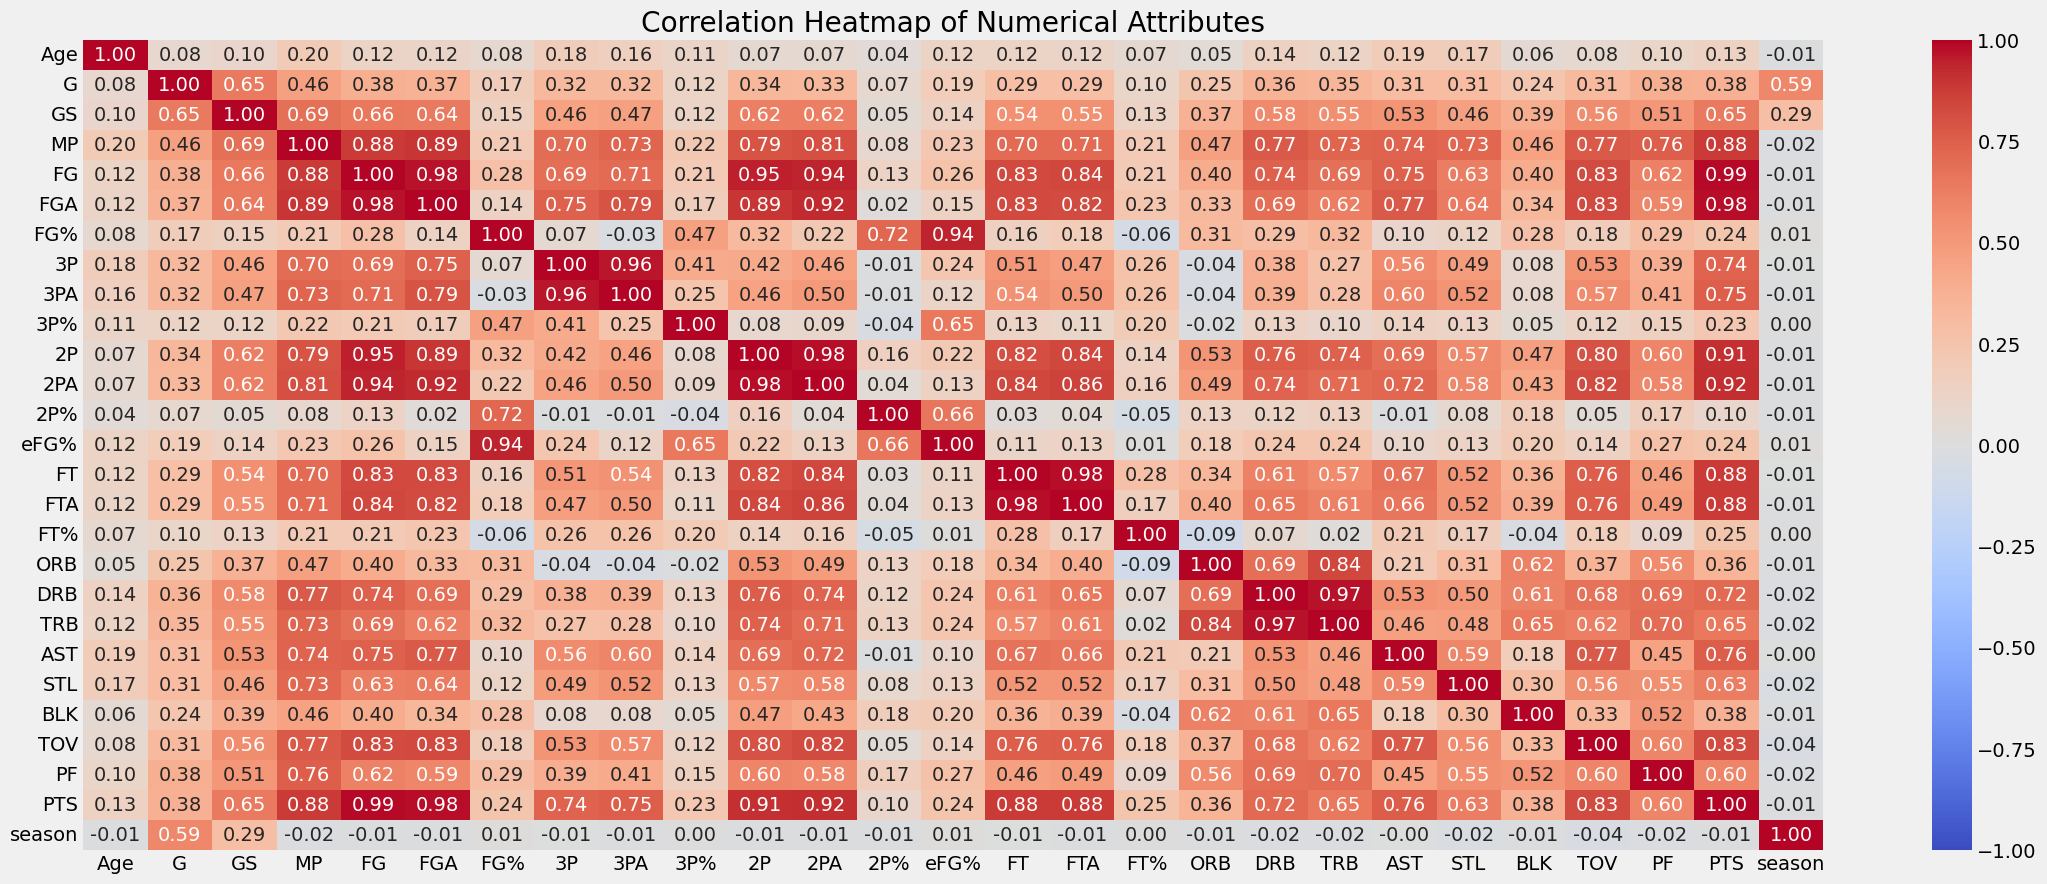

In [ ]:
num_col_incl = [item for item in nba_clean_dataset.columns.tolist() if item not in ['week_of_month', 'week_of_year']]

numerical_cols = nba_clean_dataset[num_col_incl].select_dtypes(include=['number']).columns
correlation_matrix = nba_clean_dataset[numerical_cols].corr()

plt.figure(figsize=(25, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Attributes')
plt.show()

### Point per game
As the basketball game is measured by the total points achieved at the end of each game, it's fair to assume that Points Per Game (represented by PTS) is the main reference metric to measure player performance. This part will discuss other attributes that may have a dependency on Points Per Game achievement.

> #### Distribution
Some insight regarding point distribution are:
1. In general, point distribution for each season tends to be left-skewed. However, we can also observe long tails with similar ranges across all seasons, indicating that although high-scoring events may have low frequency, they consistently occur in every season.
2. The point distribution breakdown based on `month_flag` shows the familiar left-skewed graph. However, the frequency of scoring low points in November 2023 is relatively higher compared to December 2023 or January 2024.
3. The point distribution breakdown based on team also shows a left-skewed graph with an average of around 5 points, except for team "DET," which has a shorter right tail compared to other teams.

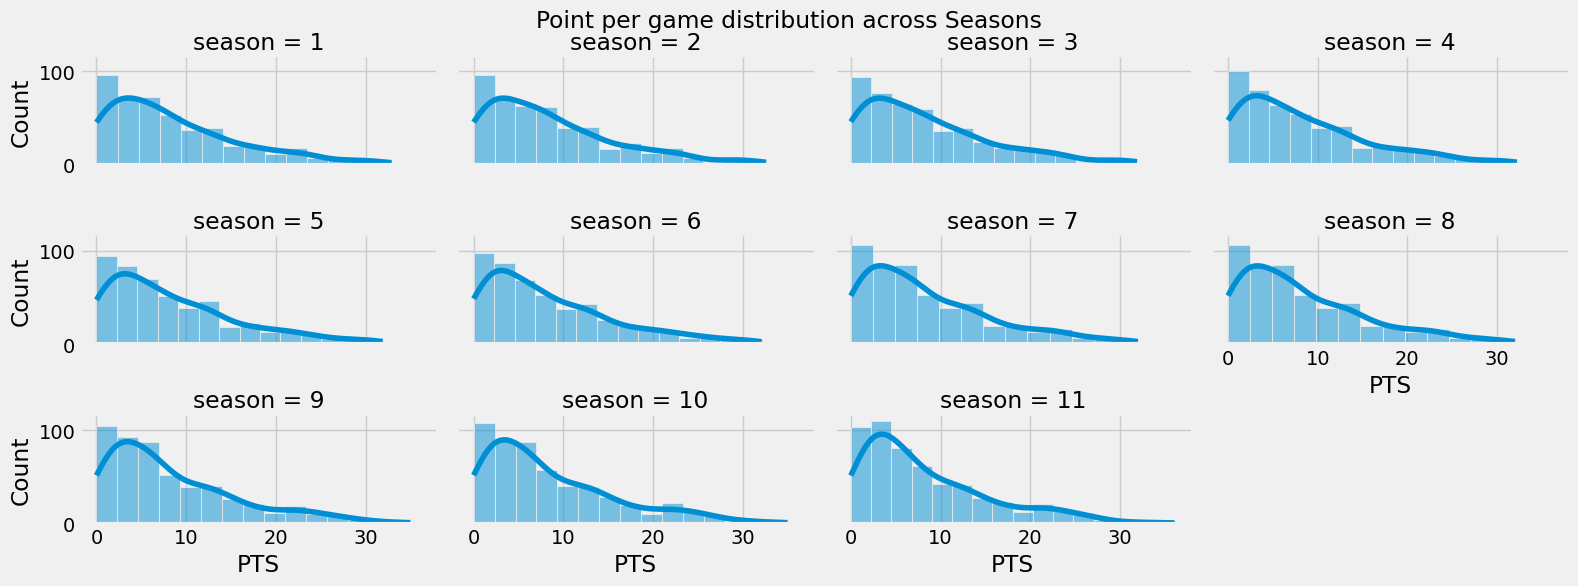

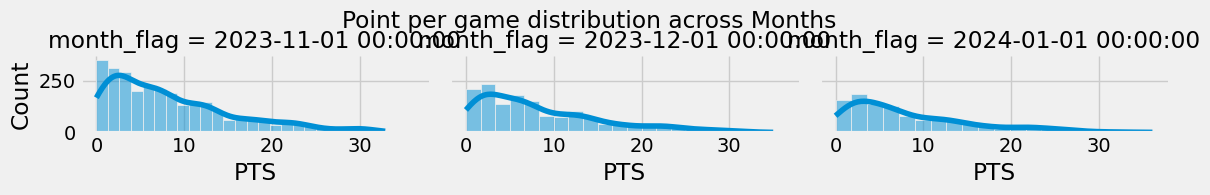

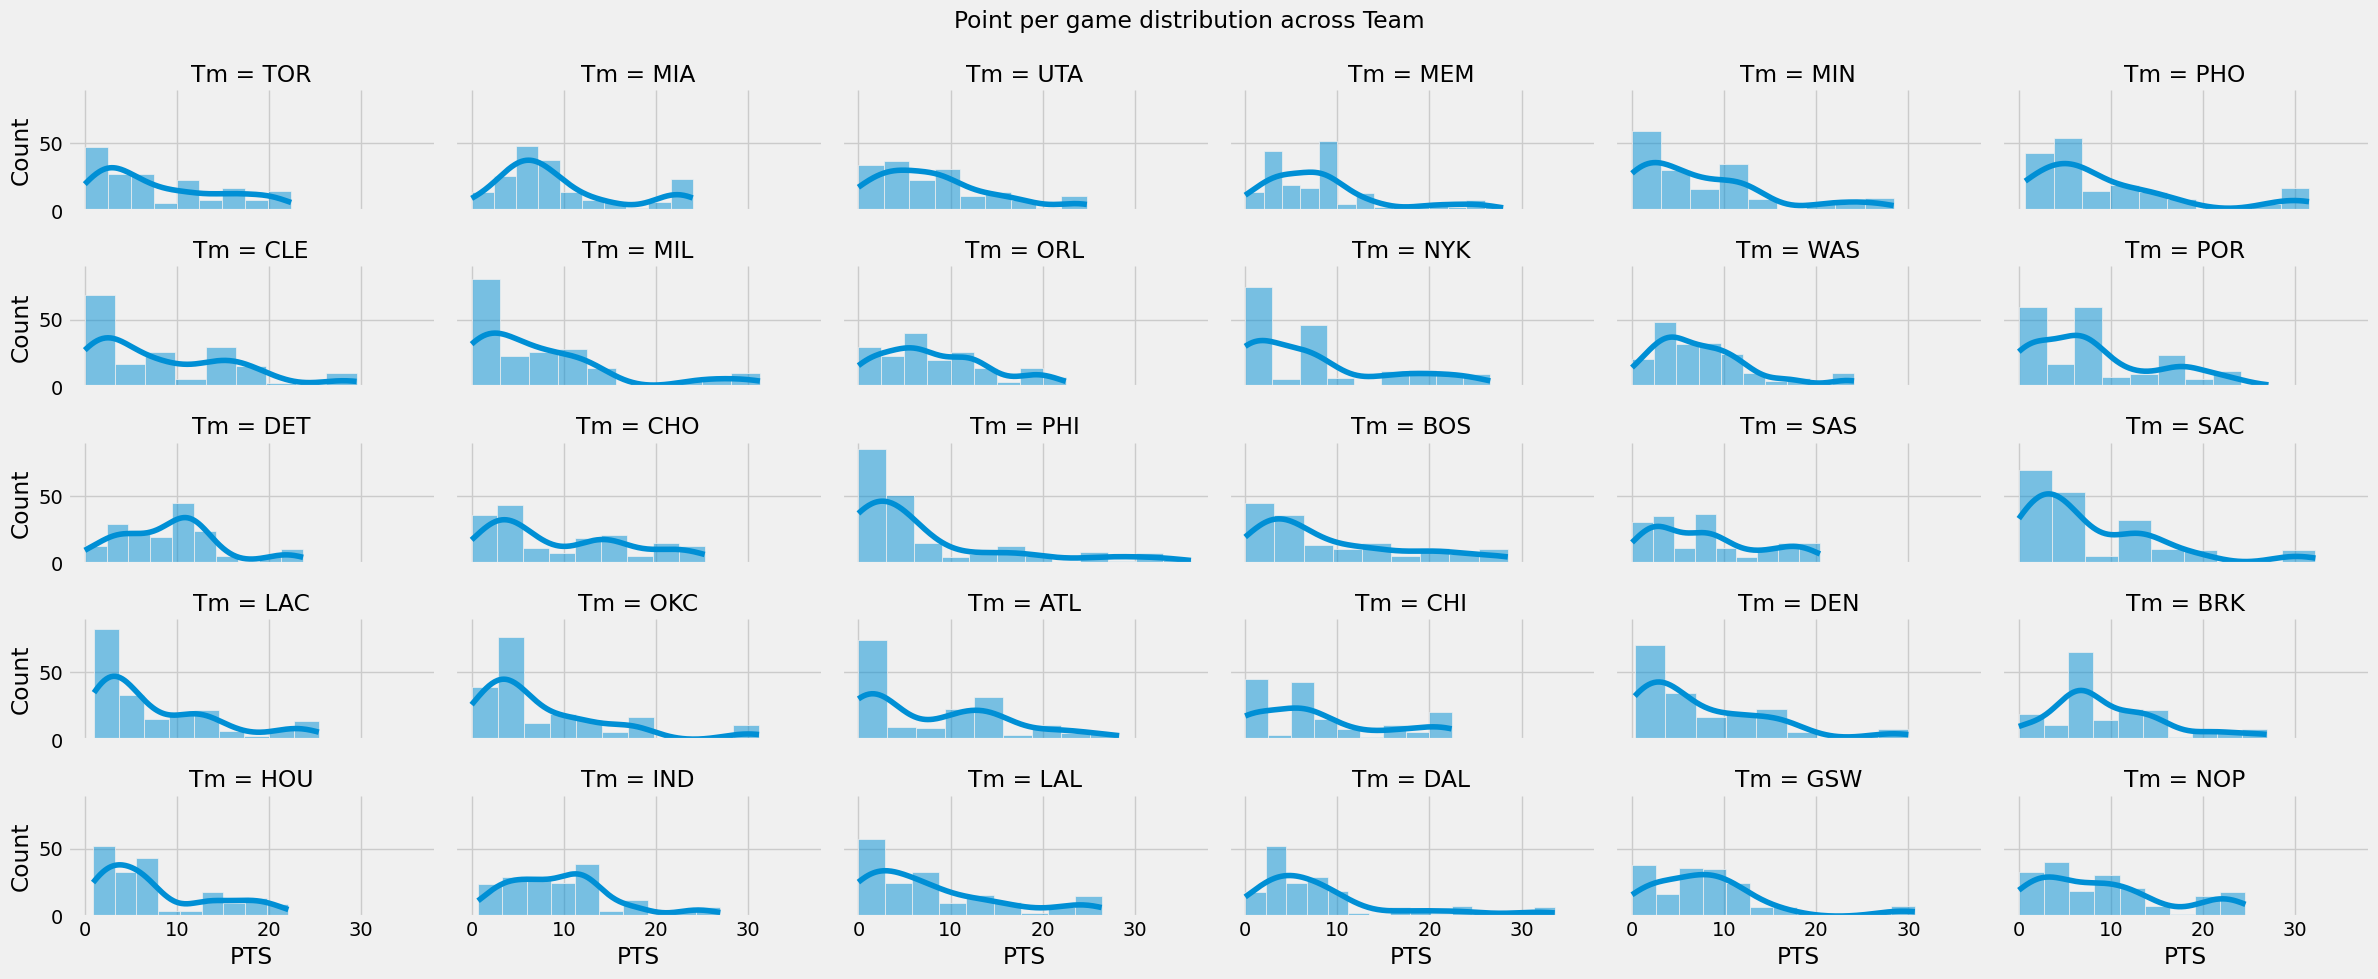

In [ ]:
import warnings
warnings.filterwarnings("ignore")

g1 = sns.FacetGrid(nba_clean_dataset, col='season', height=2, aspect=2, col_wrap=4)
g1.map_dataframe(sns.histplot, x='PTS', kde=True)
g1.fig.suptitle('Point per game distribution across Seasons')
plt.subplots_adjust(top=0.9)
plt.show()

g2 = sns.FacetGrid(nba_clean_dataset, col='month_flag', height=2, aspect=2, col_wrap=3)
g2.map_dataframe(sns.histplot, x='PTS', kde=True)
g2.fig.suptitle('Point per game distribution across Months')
plt.subplots_adjust(top=0.75)
plt.show()

g3 = sns.FacetGrid(nba_clean_dataset, col='Tm', height=2, aspect=2, col_wrap=6)
g3.map_dataframe(sns.histplot, x='PTS', kde=True)
g3.fig.suptitle('Point per game distribution across Team')
plt.subplots_adjust(top=0.9)
plt.show()

> #### High Performance Players
Some insight regarding High Performance Players
1. Top-10 performing players have accumulated more than 300 total points.
2. The top three highest lifetime point scorers are Joel Embiid (1st), Luka Dončić (2nd), and Kevin Durant (3rd).
3. All Top-10 players are never had a team change.
4. Most of the Top-10 players have played more than 120 games. However, the number of games played does not guarantee high performance, as players with the highest total games played (Nikola Jokić and Giannis Antetokounmpo) are not among the top three players.
5. Top-10 players tend to have low offensive rebounding numbers, with the exception of three players: Joel Embiid (1st), Giannis Antetokounmpo (5th), and Nikola Jokić (8th).

Top-10 Players based on PTS: 


,Player,PTS_x,G,timestamp,total_team_played,PTS_y
0,Joel Embiid,362.2,182,NaT,NaN,NaN
1,Luka Dončić,351.6,206,NaT,NaN,NaN
2,Kevin Durant,335.2,196,NaT,NaN,NaN
3,De'Aaron Fox,331.1,145,NaT,NaN,NaN
4,Shai Gilgeous-Alexander,330.2,202,NaT,NaN,NaN
5,Giannis Antetokounmpo,330.1,211,NaT,NaN,NaN
6,Stephen Curry,321.9,204,NaT,NaN,NaN
7,Devin Booker,318.8,126,NaT,NaN,NaN
8,Nikola Jokić,311.1,222,NaT,NaN,NaN
9,Donovan Mitchell,310.2,168,NaT,NaN,NaN


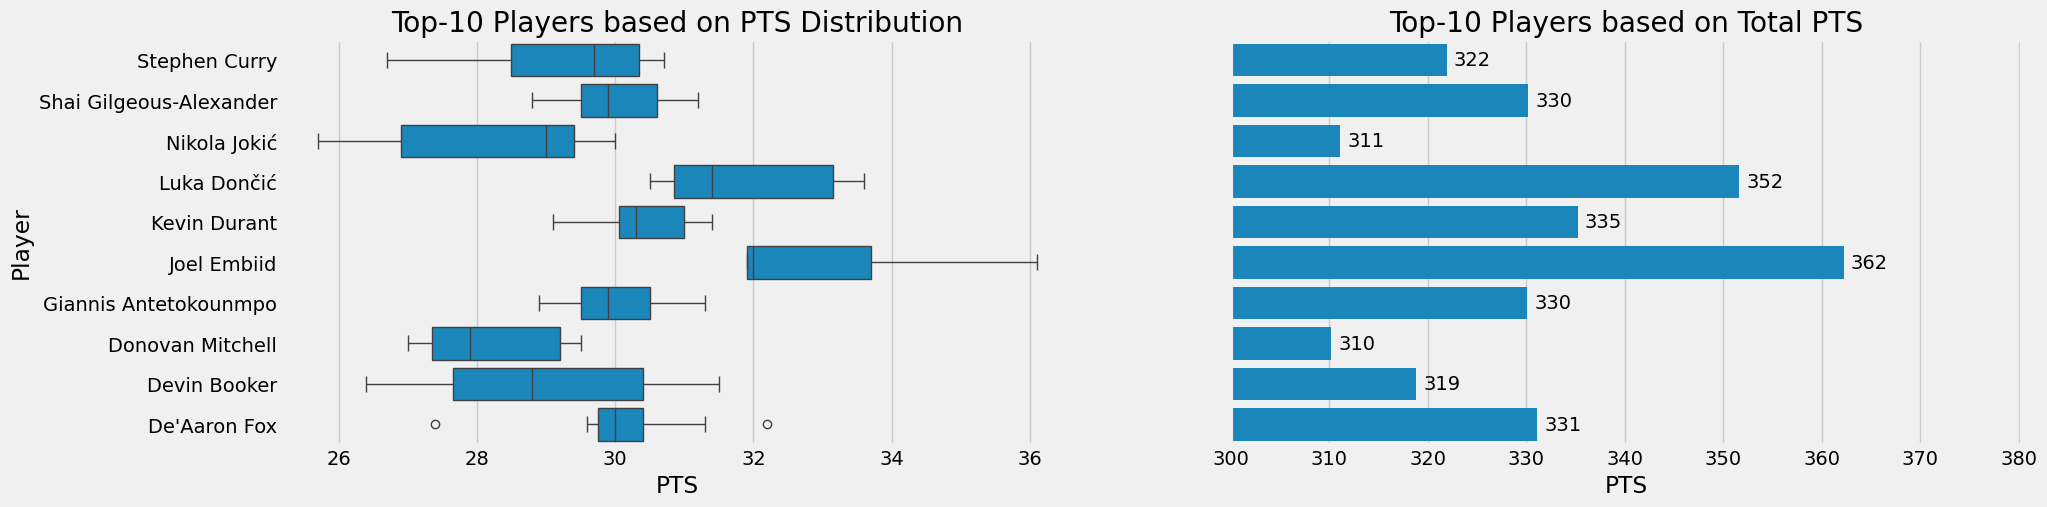

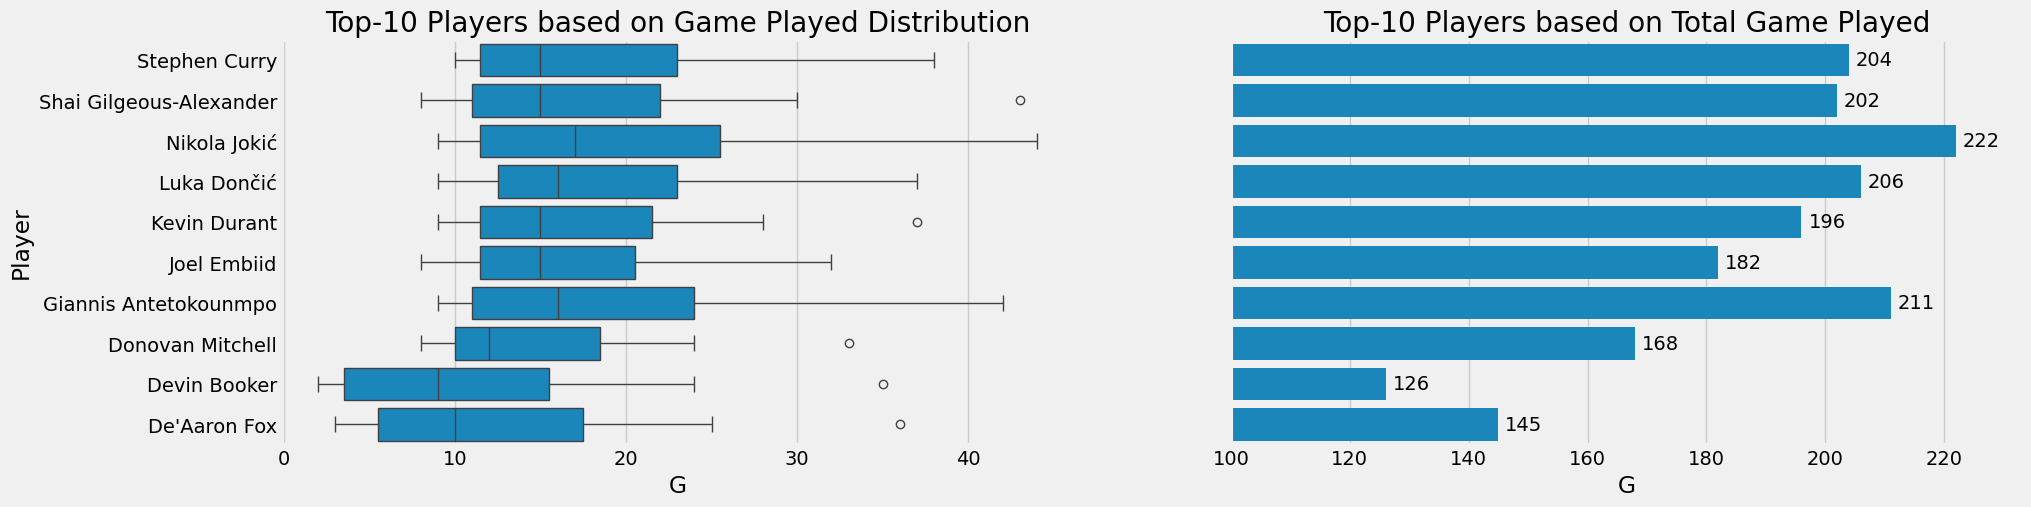

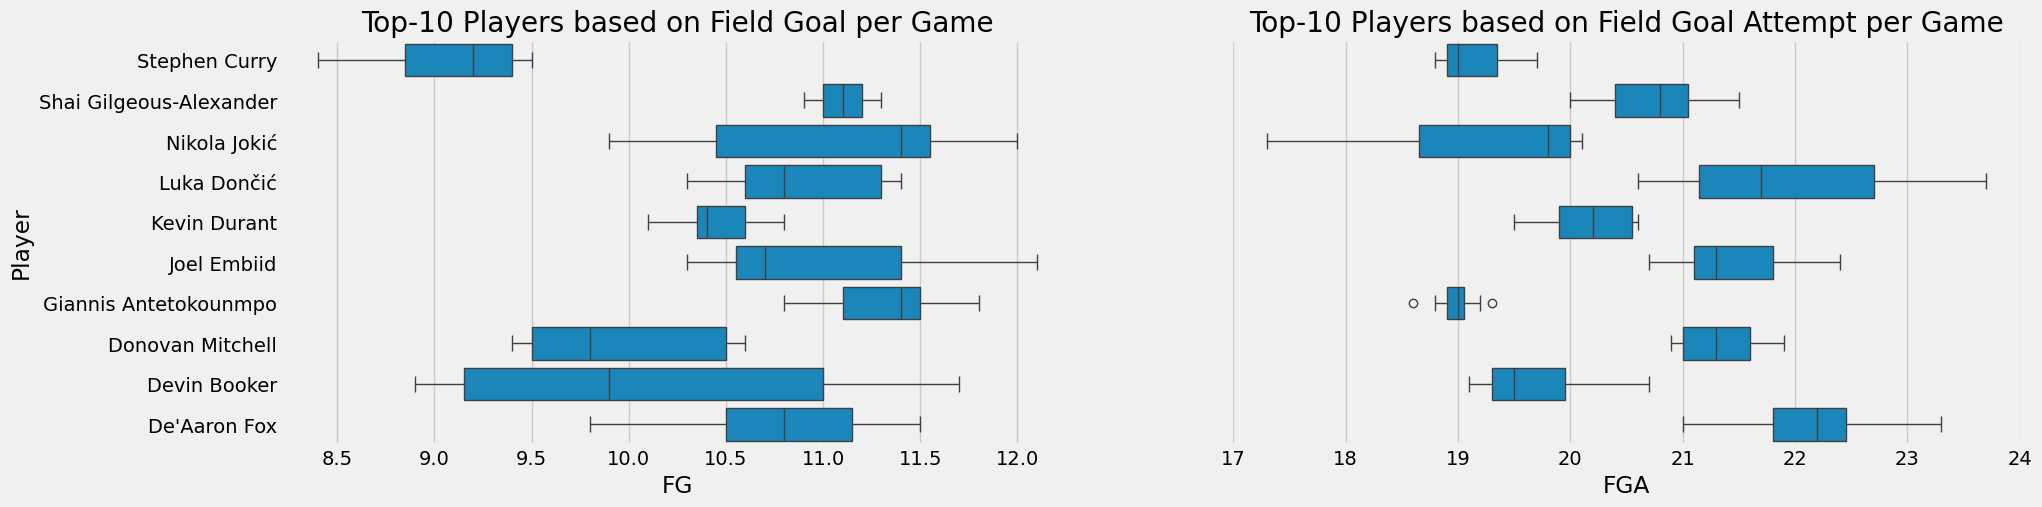

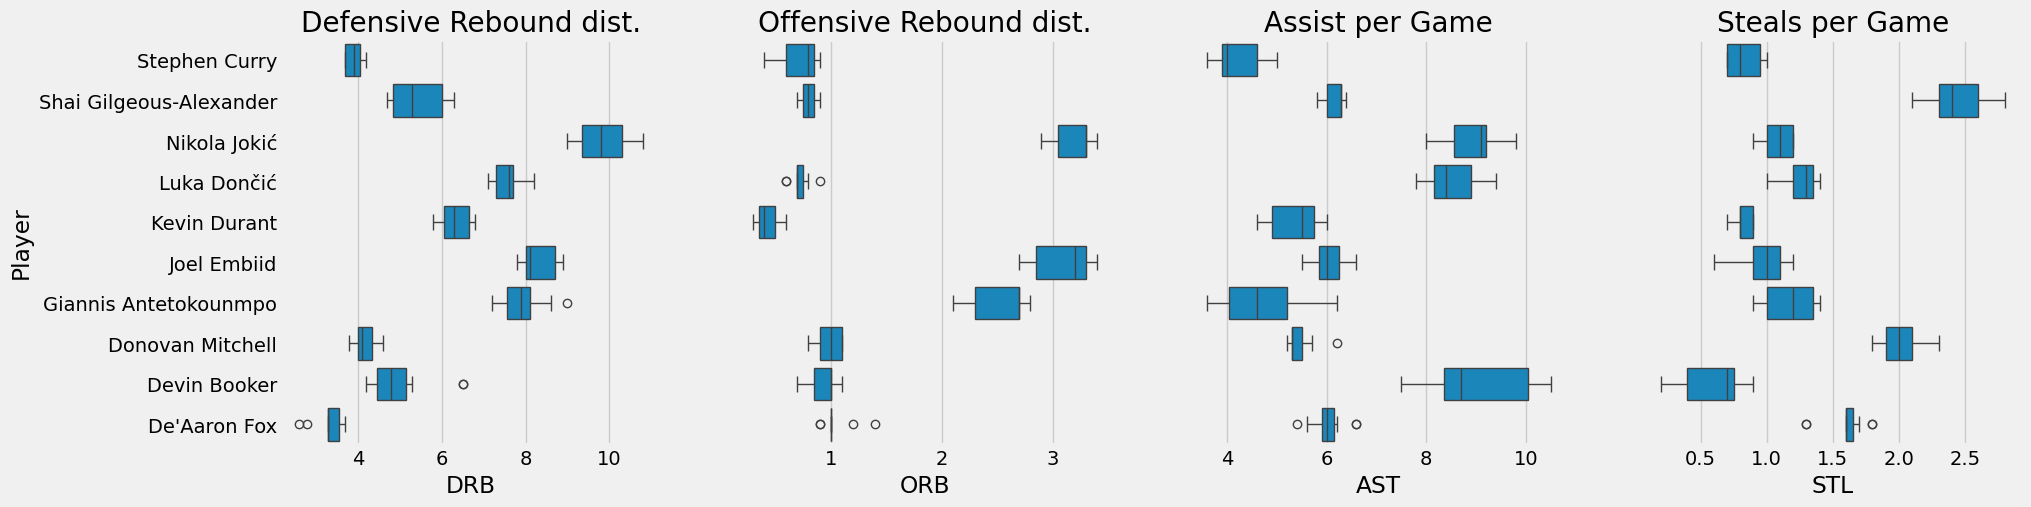

In [ ]:
high_performance_player = nba_clean_dataset[['Player','PTS','G']].groupby('Player').sum().sort_values(by='PTS', ascending=False).head(10).reset_index()

# High Performace Evaluation
print('Top-10 Players based on PTS: ')
merged_df = pd.merge(high_performance_player, tot_summary, on='Player', how='left')
pd.set_option('display.max_rows', None)
display(merged_df)
pd.set_option('display.max_rows', 5)
high_perform_rec = nba_clean_dataset.iloc[:][nba_clean_dataset['Player'].isin(high_performance_player['Player'].unique().tolist())]


## 1ST ROW VIZ ##
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
# boxplot total point
sns.boxplot(x='PTS', y='Player', data= high_perform_rec
            , ax=axes[0], order=high_perform_rec.sort_values('Player', ascending=False)['Player'])
axes[0].set_title('Top-10 Players based on PTS Distribution')

# barplot total point
barplot = sns.barplot(x='PTS', y='Player', data=high_performance_player, ax=axes[1],
            order=high_performance_player.sort_values('Player', ascending=False)['Player'])
axes[1].set_title('Top-10 Players based on Total PTS')
axes[1].set_xlim(xmin=300)
axes[1].set_ylabel('')
axes[1].set_yticklabels([])
for p in barplot.patches:
    barplot.annotate(format(p.get_width(), '.0f'),
                   (p.get_x() + p.get_width(), p.get_y() + p.get_height()/2.),
                   ha = 'left', va = 'center',
                   xytext = (5, 0), textcoords = 'offset points')

plt.show()

## 2ND ROW VIZ ##
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
# boxplot total point
sns.boxplot(x='G', y='Player', data= high_perform_rec
            , ax=axes[0], order=high_perform_rec.sort_values('Player', ascending=False)['Player'])
axes[0].set_title('Top-10 Players based on Game Played Distribution')

# barplot total point)
barplot = sns.barplot(x='G', y='Player', data=high_performance_player, ax=axes[1],
            order=high_performance_player.sort_values('Player', ascending=False)['Player'])
axes[1].set_title('Top-10 Players based on Total Game Played')
axes[1].set_xlim(xmin=100)
axes[1].set_ylabel('')
axes[1].set_yticklabels([])
for p in barplot.patches:
    barplot.annotate(format(p.get_width(), '.0f'),
                   (p.get_x() + p.get_width(), p.get_y() + p.get_height()/2.),
                   ha = 'left', va = 'center',
                   xytext = (5, 0), textcoords = 'offset points')

plt.show()

## 3ND ROW VIZ ##
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
# boxplot 1 total point
sns.boxplot(x='FG', y='Player', data= high_perform_rec
            , ax=axes[0], order=high_perform_rec.sort_values('Player', ascending=False)['Player'])
axes[0].set_title('Top-10 Players based on Field Goal per Game')

# boxplot 2 total point
sns.boxplot(x='FGA', y='Player', data=high_perform_rec
            , ax=axes[1], order=high_perform_rec.sort_values('Player', ascending=False)['Player'])
axes[1].set_title('Top-10 Players based on Field Goal Attempt per Game')
# axes[1].set_xlim(xmin=100)
axes[1].set_ylabel('')
axes[1].set_yticklabels([])

plt.show()

## 5TH ROW VIZ ##
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
# boxplot 1 total point
sns.boxplot(x='DRB', y='Player', data= high_perform_rec
            , ax=axes[0], order=high_perform_rec.sort_values('Player', ascending=False)['Player'])
axes[0].set_title('Defensive Rebound dist.')

# boxplot 2 total point
sns.boxplot(x='ORB', y='Player', data=high_perform_rec
            , ax=axes[1], order=high_perform_rec.sort_values('Player', ascending=False)['Player'])
axes[1].set_title('Offensive Rebound dist.')
# axes[1].set_xlim(xmin=100)
axes[1].set_ylabel('')
axes[1].set_yticklabels([])

sns.boxplot(x='AST', y='Player', data= high_perform_rec
            , ax=axes[2], order=high_perform_rec.sort_values('Player', ascending=False)['Player'])
axes[2].set_title('Assist per Game')
axes[2].set_ylabel('')
axes[2].set_yticklabels([])

# boxplot 2 total point
sns.boxplot(x='STL', y='Player', data=high_perform_rec
            , ax=axes[3], order=high_perform_rec.sort_values('Player', ascending=False)['Player'])
axes[3].set_title('Steals per Game')
# axes[1].set_xlim(xmin=100)
axes[3].set_ylabel('')
axes[3].set_yticklabels([])

plt.show()

# Statistical Analytics
In this part of the analytics, we will implement ARIMA statistical analysis to forecast the performance of each player. Before proceeding with the implementation, it's important to note that ARIMA is a univariate algorithm. This means that ARIMA will only utilize the historical data of one variable to predict its future values.

For better understanding, the forecasting will be conducted separately for each player, independent of other players.

## Data cleaning assumption
**As ARIMA uses only one variable**, which should be displayed sequentially, it will become problematic for 21 players who changed teams during the season. This change results in double values in one period of time.

To handle this problem, we could use a reference number which is marked by a '`Tm`' value equal to 'TOT'. This should represent the aggregated value of the player's performance across two different teams.

In [ ]:
nba_forecast_dataset = nba_clean_dataset.copy()
nba_forecast_dataset = nba_forecast_dataset.iloc[:][~nba_forecast_dataset['Player'].isin(tot_summary.Player.unique())][['Player','timestamp','PTS']]
nba_forecast_dataset = pd.concat([nba_forecast_dataset, tot_summary[['Player','timestamp','PTS']]], ignore_index = True).drop_duplicates()
nba_forecast_dataset

,Player,timestamp,PTS
0,Bam Adebayo,2023-11-13,23.1
1,Ochai Agbaji,2023-11-13,4.4
...,...,...,...
5209,Pascal Siakam,2024-01-26,61.3
5210,Dylan Windler,2024-01-26,5.5


## Data Interpolation
ARIMA is an algorithm that assumes stationarity in the time series data. This means the mean, variance, and autocorrelation of the `PTS` (Points Per Game) for each player should remain constant over time. However, the EDA revealed high variability in the `PTS` distribution for the top-10 players, suggesting potential non-stationarity. This high variability might lead to high p-values in the stationarity tests, indicating that the data may not be sufficiently stationary for accurate ARIMA forecasting.

To address this potential issue, we could consider imputing the 'off-season' periods with estimated values, such as the average performance between the previous and next seasons. This approach aims to 'bridge' the gap between seasons and potentially improve the stationarity of the time series, leading to lower p-values and more reliable ARIMA model fits.

In [ ]:
def interpolate(df):
  date_rng = pd.DataFrame({'timestamp':pd.date_range(start=np.min(df['timestamp']).strftime('%Y-%m-%d'),
                                                   end=np.max(df['timestamp']).strftime('%Y-%m-%d'))})
  merged_df = pd.merge(date_rng, df, on='timestamp', how='left')
  merged_df = merged_df[['timestamp','PTS']].set_index('timestamp')
  merged_df_filled = merged_df.reset_index()

  merged_df_filled['PTS'] = merged_df.assign(InterpolateTime=merged_df.PTS.interpolate(method='time')).reset_index()['InterpolateTime']
  merged_df_filled = merged_df_filled.set_index('timestamp')
  return merged_df_filled

def param_selection(df):
  p = d = q = range(0, 2)
  pdq = list(itertools.product(p, d, q))
  seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
  i=0
  aic_ls, order_ls, params_ls, params_seasonal_ls = [],[],[],[]
  for param in (pdq):
      for param_seasonal in seasonal_pdq:
          try:
              mod = sm.tsa.statespace.SARIMAX(df, order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
              results = mod.fit()
              aic_ls.append(results.aic)
              order_ls.append(i)
              params_ls.append(param)
              params_seasonal_ls.append(param)
              i+=1
          except:
              continue
  aic_result = pd.DataFrame({'order':order_ls, 'aic':aic_ls, 'params':params_ls, 'params_seasonal':params_seasonal_ls}).sort_values(by='aic')
  aic_result = aic_result.sort_values(by='aic').reset_index().drop(columns=['index'])
  return aic_result

def arima_modelfit(df, aic_result):
  mod = sm.tsa.statespace.SARIMAX(df,
                                  order=aic_result[:1].params.item(),
                                  seasonal_order=aic_result[:1].params_seasonal.item() + (12,),
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)
  results = mod.fit()
  return results

def arima_predict(df, results, start_date='2024-01-01', steps=60):
  if np.min(pd.to_datetime(df.index)) < pd.to_datetime(start_date):
    pred = results.get_prediction(start=pd.to_datetime(start_date), dynamic=False)
    pred_ci = pred.conf_int()
    y_forecasted = pred.predicted_mean

    pred_uc_future = results.get_forecast(steps=steps)
    pred_ci_future = pred_uc_future.conf_int()
    y_future_forecasted = pred_uc_future.predicted_mean

    pred_uc_future_df = pd.DataFrame(pred_uc_future.predicted_mean, columns=['predicted_mean']).reset_index()
    pred_ci_future_df = pd.DataFrame(pred_ci_future, columns=['lower PTS', 'upper PTS']).reset_index()

    pred_ci_future_df.columns = ['index', 'lower PTS', 'upper PTS']

    df_future = pd.merge(pred_uc_future_df, pred_ci_future_df, on='index', how='left')

    df_future = df_future.rename(columns={'index': 'timestamp',
                                          'predicted_mean':'forecast_PTS',
                                          'lower PTS':'lower_PTS',
                                          'upper PTS':'upper_PTS'
                                          })
    df_future['PTS'] = None
    df_future = df_future[['timestamp','PTS','upper_PTS','lower_PTS','forecast_PTS']]
    df_future = df_future.set_index('timestamp')

    df['upper_PTS'] = pred_ci['upper PTS']
    df['lower_PTS'] = pred_ci['lower PTS']
    df['forecast_PTS'] = y_forecasted
    union_df = pd.concat([df, df_future], ignore_index=False)

    return union_df
  else:
    pass

As ARIMA is a univariate time series model, it requires sequential data for each player. As we tried to analyst the individual performance, it requires us to evaluate the best-fit parameter for each player for optimal ARIMA performance.

To determine the optimal ARIMA model for each player, we will utilize the _Akaike Information Criterion (AIC)_. AIC helps us select the best combination of model parameters (p, d, q) by balancing model fit and complexity. A lower AIC value generally indicates a better model, as it suggests a good balance between maximizing the log-likelihood (indicating a good fit to the data) and minimizing the number of model parameters (reducing the risk of overfitting).

In [ ]:
pred_result_ls = []
for player in tqdm(nba_forecast_dataset['Player'].unique()[:100]):
  tmp_df = nba_forecast_dataset.iloc[:][nba_forecast_dataset['Player']==player]
  merged_df_filled = interpolate(tmp_df)
  aic_result = param_selection(merged_df_filled)
  results = arima_modelfit(merged_df_filled, aic_result)
  pred_result = arima_predict(merged_df_filled, results)
  pred_result['Player'] = player
  pred_result_ls.append(pred_result)

pred_result_ls = pd.concat(pred_result_ls, ignore_index=False).reset_index()
pred_result_ls.to_excel('/content/drive/MyDrive/RSatrioHWicaksono_perqara_BIanalyticTest/pred_result_1.xlsx', index=False)
display(pred_result_ls)

100%|██████████| 100/100 [23:03<00:00, 13.83s/it]


,timestamp,PTS,upper_PTS,lower_PTS,forecast_PTS,Player
0,2023-11-13,23.10,NaN,NaN,NaN,Bam Adebayo
1,2023-11-14,23.15,NaN,NaN,NaN,Bam Adebayo
...,...,...,...,...,...,...
13498,2024-03-25,NaN,21.044909,12.726317,16.885613,Jalen Duren
13499,2024-03-26,NaN,21.193090,12.675101,16.934096,Jalen Duren


In [ ]:
pred_result_ls = []
for player in tqdm(nba_forecast_dataset['Player'].unique()[100:200]):
  tmp_df = nba_forecast_dataset.iloc[:][nba_forecast_dataset['Player']==player]
  merged_df_filled = interpolate(tmp_df)
  aic_result = param_selection(merged_df_filled)
  results = arima_modelfit(merged_df_filled, aic_result)
  pred_result = arima_predict(merged_df_filled, results)
  pred_result['Player'] = player
  pred_result_ls.append(pred_result)

pred_result_ls = pd.concat(pred_result_ls, ignore_index=False).reset_index()
pred_result_ls.to_excel('/content/drive/MyDrive/RSatrioHWicaksono_perqara_BIanalyticTest/pred_result_2.xlsx', index=False)
display(pred_result_ls)

100%|██████████| 100/100 [22:58<00:00, 13.79s/it]


,timestamp,PTS,upper_PTS,lower_PTS,forecast_PTS,Player
0,2023-11-13,5.5,NaN,NaN,NaN,Tari Eason
1,2023-11-14,5.9,NaN,NaN,NaN,Tari Eason
...,...,...,...,...,...,...
13498,2024-03-25,NaN,2.358038,0.410618,1.384328,Colby Jones
13499,2024-03-26,NaN,2.362847,0.378083,1.370465,Colby Jones


In [ ]:
pred_result_ls = []
for player in tqdm(nba_forecast_dataset['Player'].unique()[200:300]):
  tmp_df = nba_forecast_dataset.iloc[:][nba_forecast_dataset['Player']==player]
  merged_df_filled = interpolate(tmp_df)
  aic_result = param_selection(merged_df_filled)
  results = arima_modelfit(merged_df_filled, aic_result)
  pred_result = arima_predict(merged_df_filled, results)
  pred_result['Player'] = player
  pred_result_ls.append(pred_result)

pred_result_ls = pd.concat(pred_result_ls, ignore_index=False).reset_index()
pred_result_ls.to_excel('/content/drive/MyDrive/RSatrioHWicaksono_perqara_BIanalyticTest/pred_result_3.xlsx', index=False)
display(pred_result_ls)

100%|██████████| 100/100 [23:24<00:00, 14.04s/it]


,timestamp,PTS,upper_PTS,lower_PTS,forecast_PTS,Player
0,2023-11-13,1.2,NaN,NaN,NaN,Damian Jones
1,2023-11-14,1.2,NaN,NaN,NaN,Damian Jones
...,...,...,...,...,...,...
13498,2024-03-25,NaN,2.405478,0.214040,1.309759,Julian Phillips
13499,2024-03-26,NaN,2.439093,0.197785,1.318439,Julian Phillips


In [ ]:
pred_result_ls = []
for player in tqdm(nba_forecast_dataset['Player'].unique()[300:400]):
  tmp_df = nba_forecast_dataset.iloc[:][nba_forecast_dataset['Player']==player]
  merged_df_filled = interpolate(tmp_df)
  aic_result = param_selection(merged_df_filled)
  results = arima_modelfit(merged_df_filled, aic_result)
  pred_result = arima_predict(merged_df_filled, results)
  pred_result['Player'] = player
  pred_result_ls.append(pred_result)

pred_result_ls = pd.concat(pred_result_ls, ignore_index=False).reset_index()
pred_result_ls.to_excel('/content/drive/MyDrive/RSatrioHWicaksono_perqara_BIanalyticTest/pred_result_4.xlsx', index=False)
display(pred_result_ls)

100%|██████████| 100/100 [22:58<00:00, 13.79s/it]


,timestamp,PTS,upper_PTS,lower_PTS,forecast_PTS,Player
0,2023-11-13,2.5,NaN,NaN,NaN,Jalen Pickett
1,2023-11-14,2.5,NaN,NaN,NaN,Jalen Pickett
...,...,...,...,...,...,...
13498,2024-03-25,NaN,19.677832,-0.488974,9.594429,Jarace Walker
13499,2024-03-26,NaN,19.988167,-0.650854,9.668657,Jarace Walker


In [ ]:
pred_result_ls = []
for player in tqdm(nba_forecast_dataset['Player'].unique()[400:500]):
  tmp_df = nba_forecast_dataset.iloc[:][nba_forecast_dataset['Player']==player]
  merged_df_filled = interpolate(tmp_df)
  aic_result = param_selection(merged_df_filled)
  results = arima_modelfit(merged_df_filled, aic_result)
  pred_result = arima_predict(merged_df_filled, results)
  if pred_result is not None:
    pred_result['Player'] = player
    pred_result_ls.append(pred_result)
  else:
    pass

pred_result_ls = pd.concat(pred_result_ls, ignore_index=False).reset_index()
pred_result_ls.to_excel('/content/drive/MyDrive/RSatrioHWicaksono_perqara_BIanalyticTest/pred_result_5.xlsx', index=False)
display(pred_result_ls)

100%|██████████| 100/100 [20:24<00:00, 12.24s/it]


,timestamp,PTS,upper_PTS,lower_PTS,forecast_PTS,Player
0,2023-11-13,16.8,NaN,NaN,NaN,Lonnie Walker IV
1,2023-11-14,16.1,NaN,NaN,NaN,Lonnie Walker IV
...,...,...,...,...,...,...
11078,2024-03-25,NaN,2.988708,2.985212,2.986960,Oscar Tshiebwe
11079,2024-03-26,NaN,2.980052,2.976477,2.978264,Oscar Tshiebwe


In [ ]:
pred_result_ls = []
for player in tqdm(nba_forecast_dataset['Player'].unique()[500:]):
  tmp_df = nba_forecast_dataset.iloc[:][nba_forecast_dataset['Player']==player]
  merged_df_filled = interpolate(tmp_df)
  aic_result = param_selection(merged_df_filled)
  results = arima_modelfit(merged_df_filled, aic_result)
  pred_result = arima_predict(merged_df_filled, results)
  if pred_result is not None:
    pred_result['Player'] = player
    pred_result_ls.append(pred_result)
  else:
    pass

pred_result_ls = pd.concat(pred_result_ls, ignore_index=False).reset_index()
pred_result_ls.to_excel('/content/drive/MyDrive/RSatrioHWicaksono_perqara_BIanalyticTest/pred_result_6.xlsx', index=False)
display(pred_result_ls)

100%|██████████| 33/33 [03:03<00:00,  5.56s/it]


,timestamp,PTS,upper_PTS,lower_PTS,forecast_PTS,Player
0,2023-11-13,13.50,NaN,NaN,NaN,Nicolas Batum
1,2023-11-14,14.15,NaN,NaN,NaN,Nicolas Batum
...,...,...,...,...,...,...
797,2024-03-25,NaN,16.006888,6.669549,11.338218,Daniel Theis
798,2024-03-26,NaN,16.069168,6.486254,11.277711,Daniel Theis


## Forecast Result
In overall result, the ARIMA model shows better result with 99.68% of accuracy despite only 93% of total players are forecastable.

Based on forecast results to top-10 players, there are 5 players which have tendency to have **performance improvement in the future. They are Giannis Antetokounmpo, Joei Emblid, Devin Booker, Luca Doncic, and Nikola Jokic.**

In [ ]:
forecast_1 = pd.read_excel('/content/drive/MyDrive/RSatrioHWicaksono_perqara_BIanalyticTest/pred_result_1.xlsx')
forecast_2 = pd.read_excel('/content/drive/MyDrive/RSatrioHWicaksono_perqara_BIanalyticTest/pred_result_2.xlsx')
forecast_3 = pd.read_excel('/content/drive/MyDrive/RSatrioHWicaksono_perqara_BIanalyticTest/pred_result_3.xlsx')
forecast_4 = pd.read_excel('/content/drive/MyDrive/RSatrioHWicaksono_perqara_BIanalyticTest/pred_result_4.xlsx')
forecast_5 = pd.read_excel('/content/drive/MyDrive/RSatrioHWicaksono_perqara_BIanalyticTest/pred_result_5.xlsx')
forecast_6 = pd.read_excel('/content/drive/MyDrive/RSatrioHWicaksono_perqara_BIanalyticTest/pred_result_6.xlsx')

forecast_result = pd.concat([forecast_1, forecast_2, forecast_3, forecast_4, forecast_5, forecast_6], ignore_index=False)
print('Total forecastable player: ',len(forecast_result.Player.unique()))
display(forecast_result)

forecast_result_eval = forecast_result.iloc[:][(forecast_result['forecast_PTS'].notna())&(forecast_result['PTS'].notna())]
forecast_result_eval['squared_error'] = (forecast_result_eval['PTS'] - forecast_result_eval['forecast_PTS'])**2
mse = np.mean(forecast_result_eval['squared_error'])
print(f"Mean Squared Error (MSE): {mse}")

forecast_result_eval['abs_percentage_error'] = abs((forecast_result_eval['PTS'] - forecast_result_eval['forecast_PTS']) / forecast_result_eval['PTS'])
mape = np.mean(forecast_result_eval['abs_percentage_error']) * 100
accuracy = 100 - mape
print(f"Accuracy (100 - MAPE): {accuracy:.2f}%")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Total forecastable player:  498


,timestamp,PTS,upper_PTS,lower_PTS,forecast_PTS,Player
0,2023-11-13,23.10,NaN,NaN,NaN,Bam Adebayo
1,2023-11-14,23.15,NaN,NaN,NaN,Bam Adebayo
...,...,...,...,...,...,...
797,2024-03-25,NaN,16.006888,6.669549,11.338218,Daniel Theis
798,2024-03-26,NaN,16.069168,6.486254,11.277711,Daniel Theis


Mean Squared Error (MSE): 0.03869165231665477
Accuracy (100 - MAPE): 99.68%
Root Mean Squared Error (RMSE): 0.19670193775521067


In [ ]:
top_10 = high_perform_rec.Player.unique().tolist()
top_10_forecast = forecast_result.iloc[:][forecast_result['Player'].isin(top_10)]
top_10_forecast

,timestamp,PTS,upper_PTS,lower_PTS,forecast_PTS,Player
945,2023-11-13,28.9,NaN,NaN,NaN,Giannis Antetokounmpo
946,2023-11-14,29.2,NaN,NaN,NaN,Giannis Antetokounmpo
...,...,...,...,...,...,...
9448,2024-03-25,NaN,29.950624,23.766230,26.858427,Donovan Mitchell
9449,2024-03-26,NaN,30.001018,23.690902,26.845960,Donovan Mitchell


In [ ]:
top_10_forecast_act = top_10_forecast[['timestamp', 'Player', 'PTS']]
top_10_forecast_act = top_10_forecast_act.rename(columns={'PTS':'value'})
top_10_forecast_act['flag'] = 'ACTUAL'
top_10_forecast_forecast = top_10_forecast[['timestamp', 'Player', 'forecast_PTS']]
top_10_forecast_forecast = top_10_forecast_forecast.rename(columns={'forecast_PTS':'value'})
top_10_forecast_forecast['flag'] = 'FORECAST'

top_10_forecast_final = pd.concat([top_10_forecast_act, top_10_forecast_forecast], ignore_index=False)
top_10_forecast_final = top_10_forecast_final.reset_index(drop=True)
top_10_forecast_final.sort_values(by=['Player', 'timestamp'])

,timestamp,Player,value,flag
810,2023-11-13,De'Aaron Fox,31.300000,ACTUAL
2160,2023-11-13,De'Aaron Fox,NaN,FORECAST
...,...,...,...,...
404,2024-03-26,Stephen Curry,NaN,ACTUAL
1754,2024-03-26,Stephen Curry,25.095921,FORECAST


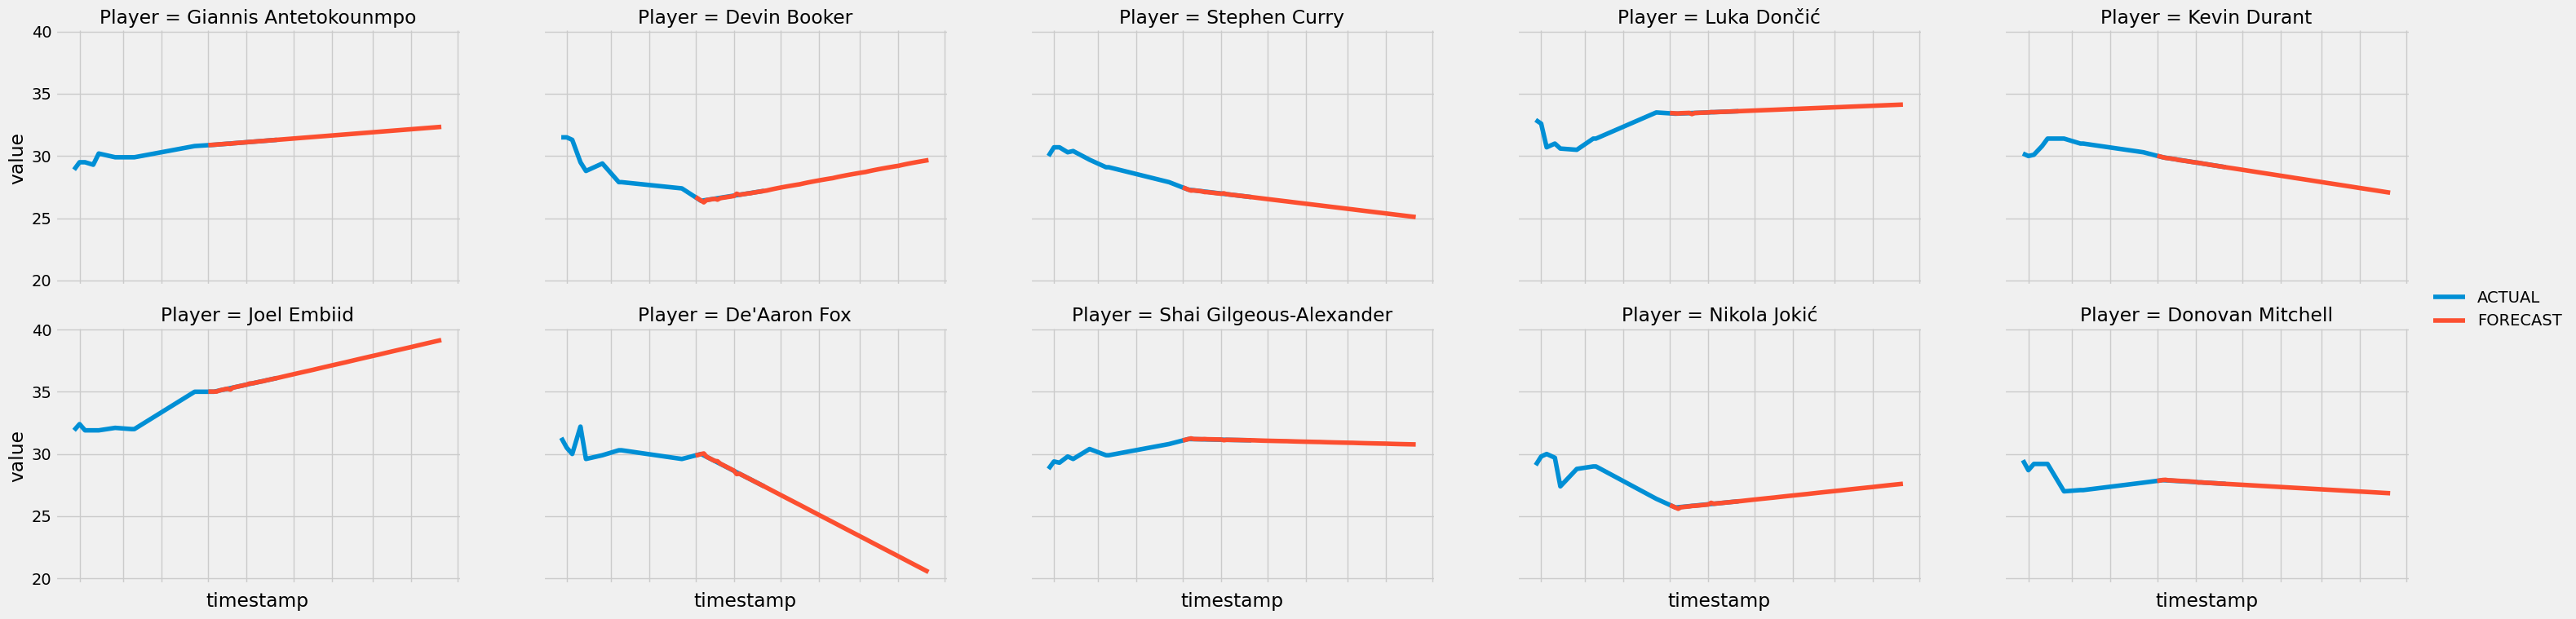

In [ ]:
g = sns.FacetGrid(top_10_forecast_final, col='Player', height=4, aspect=1.5, col_wrap=5)
g.map_dataframe(sns.lineplot, x='timestamp', y='value', hue='flag')
g.add_legend()
for axes in g.axes.flat:
  _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
plt.show()